<a href="https://colab.research.google.com/github/mckuoling/ERP_CORE/blob/master/The%20journey%20to%20find%20N400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne
import mne
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1_Import_Raw_EEG_Shift_DS_Reref_Hpfilt.m

In [ ]:

subject_nums = range(1, 41)

# --- 只需要這一份 for 迴圈！每次先清空 list ---
raw_list = []
events_list = []
event_id_list = []

for num in subject_nums:
    file_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/{num}/{num}_N400.set'
    print(f'Loading: {file_path}')
    raw = mne.io.read_raw_eeglab(file_path, preload=True)

    # 事件處理
    events, event_id = mne.events_from_annotations(raw)
    shift_in_samples = int(0.026 * raw.info['sfreq'])
    events[:, 0] = events[:, 0] + shift_in_samples

    # 降採樣
    raw.resample(256)

    # 建立 HEOG/VEOG
    # 根據你的 channel 名稱調整下列名稱！
    data = raw.get_data(picks=['HEOG_left', 'HEOG_right', 'VEOG_lower', 'FP2'])
    heog = data[0] - data[1]
    veog = data[2] - data[3]
    heog_raw = mne.io.RawArray(heog[np.newaxis, :], mne.create_info(['HEOG'], raw.info['sfreq'], ['eog']))
    veog_raw = mne.io.RawArray(veog[np.newaxis, :], mne.create_info(['VEOG'], raw.info['sfreq'], ['eog']))
    raw.add_channels([heog_raw, veog_raw])

    # 存進 list
    raw_list.append(raw)
    events_list.append(events)
    event_id_list.append(event_id)

# 確認 raw_list 只有 40
print(f'raw_list 長度: {len(raw_list)}')
assert len(raw_list) == 40, "raw_list 應該要 40 筆資料！"

# --- 加載 channel location ---
montage = mne.channels.make_standard_montage('standard_1020')
for raw in raw_list:
    raw.set_montage(montage, on_missing='ignore')

# --- 濾波 ---
for raw in raw_list:
    raw.filter(l_freq=0.1, h_freq=None)

# --- 儲存 ---
save_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'
os.makedirs(save_dir, exist_ok=True)

for idx, raw in enumerate(raw_list, 1):
    save_path = f'{save_dir}N400_{idx:02d}_preprocessed_raw.fif'
    print(f'Saving: {save_path}')
    raw.save(save_path, overwrite=True)

Loading: /content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/1/1_N400.set
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/1/1_N400.fdt
Reading 0 ... 585727  =      0.000 ...   571.999 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Creating RawArray with float64 data, n_channels=1, n_times=146432
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=146432
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Loading: /content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/2/2_N400.set
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/2/2_N400.fdt
Reading 0 ... 510975  =      0.000 ...   498.999 secs...
Used Annotat

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.7s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif
[done]
Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_raw.fif
[done]
Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/s

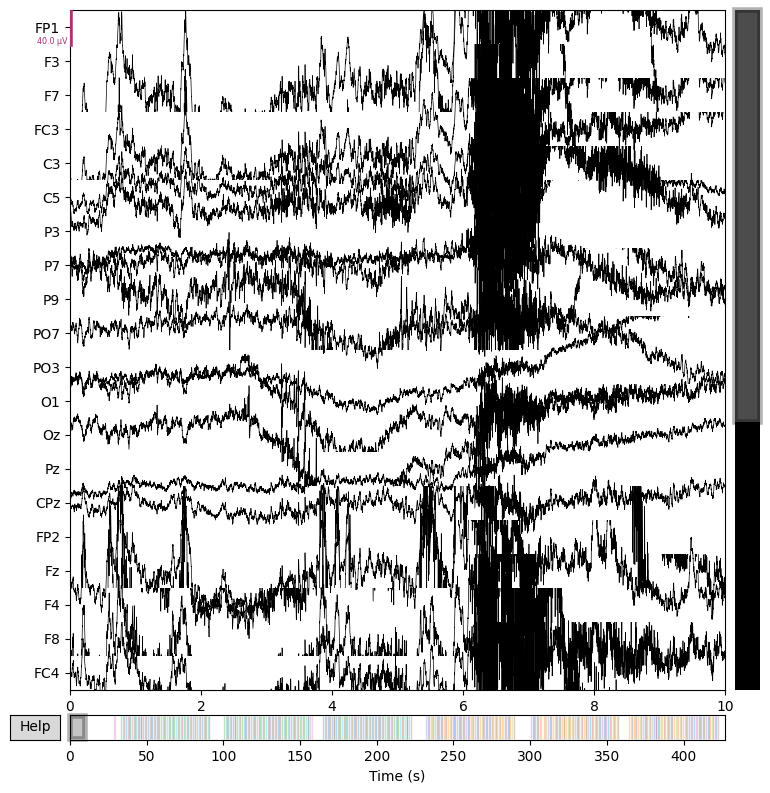

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 33 EEG
 custom_ref_applied: False
 dig: 33 items (33 EEG)
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
>

In [ ]:
n=5  # 受試者編號
raw_n = raw_list[n - 1]  # 記得python 的 list 是從 0 開始編號
raw_n.plot()
raw_n.info

#2_ICA_Prep.m

In [ ]:


from google.colab import drive
drive.mount('/content/drive')
input_path ='/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif'
raw = mne.io.read_raw_fif(input_path, preload=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...


In [ ]:


# ICA 參數表格路徑
ica_param_path = '/content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/EEG_ERP_Processing/ICA_Prep_Values_N400.xlsx'
param_df = pd.read_excel(ica_param_path)
param_df.columns = ['SUBID', 'AmpthValue', 'WindowValue', 'StepValue']

# 受試者編號
subject_nums = range(1, 41)

# 處理每一位受試者（單純 for 迴圈，不會重複載入）
for subject_id in subject_nums:

    # === 1. 載入已經預處理的資料 ===
    input_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_{subject_id:02d}_preprocessed_raw.fif'
    print(f'Processing: {input_path}')
    raw = mne.io.read_raw_fif(input_path, preload=True)

    # === 2. 移除 break 段落 ===
    event_ids = [111, 112, 121, 122, 211, 212, 221, 222]
    events, event_dict = mne.events_from_annotations(raw)
    stim_events = events[np.isin(events[:, 2], event_ids)]
    inter_event_times = np.diff(stim_events[:, 0]) / raw.info['sfreq']
    long_gaps = np.where(inter_event_times >= 2.0)[0]
    bad_segments = []
    for i in long_gaps:
        start = stim_events[i, 0] / raw.info['sfreq']
        end = stim_events[i+1, 0] / raw.info['sfreq']
        bad_segments.append([start, end])
    tmin = 0
    tmax = raw.times[-1]
    good_segments = []
    for start, end in bad_segments:
        if start > tmin:
            good_segments.append((tmin, start))
        tmin = end
    if tmin < tmax:
        good_segments.append((tmin, tmax))
    from mne import concatenate_raws
    raws = [raw.copy().crop(tmin=start, tmax=end) for start, end in good_segments]
    raw_clean = concatenate_raws(raws)

    # === 3. 取得 ICA 參數 ===
    params = param_df[param_df['SUBID'] == subject_id].iloc[0]
    amp_thresh = params['AmpthValue']
    win_len = params['WindowValue']
    step = params['StepValue']

    # === 4. Sliding window 自動標註 artifact ===
    def sliding_window_artifact_detection(raw, picks, amp_thresh=150, win_len=0.5, step=0.05):
        sfreq = raw.info['sfreq']
        n_samples = raw.n_times
        win_samp = int(win_len * sfreq)
        step_samp = int(step * sfreq)
        times = raw.times
        data = raw.get_data(picks=picks) * 1e6  # 轉 μV
        bad_segments = []
        for start in range(0, n_samples - win_samp, step_samp):
            stop = start + win_samp
            segment = data[:, start:stop]
            max_amp = np.max(np.abs(segment))
            if max_amp > amp_thresh:
                onset = times[start]
                duration = win_len
                bad_segments.append((onset, duration, 'BAD_artifact'))
        onsets, durations, descriptions = zip(*bad_segments) if bad_segments else ([], [], [])
        return mne.Annotations(onsets, durations, descriptions)

    annotations = sliding_window_artifact_detection(
        raw_clean,
        picks=raw_clean.ch_names[:31],  # 請根據你的 EEG channel 數量調整
        amp_thresh=amp_thresh,
        win_len=win_len / 1000,
        step=step / 1000
    )
    # 合併原本 annotation（含event），只加 BAD_artifact 不覆蓋
    raw_clean.set_annotations(raw_clean.annotations + annotations) ##new added

    # === 5. (選擇性) filter/其他處理 ===
    # raw_clean = raw_clean.notch_filter(np.arange(50, 251, 50))  # 若需要 notch
    raw_clean = raw_clean.copy().crop(tmin=0)
    raw_clean = raw_clean.copy().filter(l_freq=0.1, h_freq=30)

    # === 6. 儲存結果 ===
    output_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_{subject_id:02d}_preprocessed_ica_ready_raw.fif'
    print(f'Saving: {output_path}')
    raw_clean.save(output_path, overwrite=True)

Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_raw.fif...
    Range : 0 ... 127743 =      0.000 ...   498.996 secs
Ready.
Reading 0 ... 127743  =      0.000 ...   498.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_raw.fif...
    Range : 0 ... 107007 =      0.000 ...   417.996 secs
Ready.
Reading 0 ... 107007  =      0.000 ...   417.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_raw.fif...
    Range : 0 ... 158719 =      0.000 ...   619.996 secs
Ready.
Reading 0 ... 158719  =      0.000 ...   619.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_raw.fif...
    Range : 0 ... 109311 =      0.000 ...   426.996 secs
Ready.
Reading 0 ... 109311  =      0.000 ...   426.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_raw.fif...
    Range : 0 ... 101631 =      0.000 ...   396.996 secs
Ready.
Reading 0 ... 101631  =      0.000 ...   396.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_raw.fif...
    Range : 0 ... 102655 =      0.000 ...   400.996 secs
Ready.
Reading 0 ... 102655  =      0.000 ...   400.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_raw.fif...
    Range : 0 ... 121855 =      0.000 ...   475.996 secs
Ready.
Reading 0 ... 121855  =      0.000 ...   475.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_raw.fif...
    Range : 0 ... 99071 =      0.000 ...   386.996 secs
Ready.
Reading 0 ... 99071  =      0.000 ...   386.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_raw.fif...
    Range : 0 ... 118015 =      0.000 ...   460.996 secs
Ready.
Reading 0 ... 118015  =      0.000 ...   460.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_raw.fif...
    Range : 0 ... 103679 =      0.000 ...   404.996 secs
Ready.
Reading 0 ... 103679  =      0.000 ...   404.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_raw.fif...
    Range : 0 ... 99839 =      0.000 ...   389.996 secs
Ready.
Reading 0 ... 99839  =      0.000 ...   389.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_raw.fif...
    Range : 0 ... 106495 =      0.000 ...   415.996 secs
Ready.
Reading 0 ... 106495  =      0.000 ...   415.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_raw.fif...
    Range : 0 ... 103679 =      0.000 ...   404.996 secs
Ready.
Reading 0 ... 103679  =      0.000 ...   404.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_raw.fif...
    Range : 0 ... 102655 =      0.000 ...   400.996 secs
Ready.
Reading 0 ... 102655  =      0.000 ...   400.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_raw.fif...
    Range : 0 ... 174079 =      0.000 ...   679.996 secs
Ready.
Reading 0 ... 174079  =      0.000 ...   679.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_raw.fif...
    Range : 0 ... 109055 =      0.000 ...   425.996 secs
Ready.
Reading 0 ... 109055  =      0.000 ...   425.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_raw.fif...
    Range : 0 ... 114431 =      0.000 ...   446.996 secs
Ready.
Reading 0 ... 114431  =      0.000 ...   446.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_raw.fif...
    Range : 0 ... 104703 =      0.000 ...   408.996 secs
Ready.
Reading 0 ... 104703  =      0.000 ...   408.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_raw.fif...
    Range : 0 ... 106751 =      0.000 ...   416.996 secs
Ready.
Reading 0 ... 106751  =      0.000 ...   416.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_raw.fif...
    Range : 0 ... 110847 =      0.000 ...   432.996 secs
Ready.
Reading 0 ... 110847  =      0.000 ...   432.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_raw.fif...
    Range : 0 ... 107775 =      0.000 ...   420.996 secs
Ready.
Reading 0 ... 107775  =      0.000 ...   420.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_ready_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_raw.fif...
    Range : 0 ... 102399 =      0.000 ...   399.996 secs
Ready.
Reading 0 ... 102399  =      0.000 ...   399.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_raw.fif...
    Range : 0 ... 104447 =      0.000 ...   407.996 secs
Ready.
Reading 0 ... 104447  =      0.000 ...   407.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_raw.fif...
    Range : 0 ... 108799 =      0.000 ...   424.996 secs
Ready.
Reading 0 ... 108799  =      0.000 ...   424.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_ready_raw.fif


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_raw.fif...
    Range : 0 ... 108031 =      0.000 ...   421.996 secs
Ready.
Reading 0 ... 108031  =      0.000 ...   421.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_raw.fif...
    Range : 0 ... 105983 =      0.000 ...   413.996 secs
Ready.
Reading 0 ... 105983  =      0.000 ...   413.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_raw.fif...
    Range : 0 ... 101887 =      0.000 ...   397.996 secs
Ready.
Reading 0 ... 101887  =      0.000 ...   397.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_raw.fif...
    Range : 0 ... 114943 =      0.000 ...   448.996 secs
Ready.
Reading 0 ... 114943  =      0.000 ...   448.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_raw.fif...
    Range : 0 ... 116991 =      0.000 ...   456.996 secs
Ready.
Reading 0 ... 116991  =      0.000 ...   456.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_raw.fif...
    Range : 0 ... 103679 =      0.000 ...   404.996 secs
Ready.
Reading 0 ... 103679  =      0.000 ...   404.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_raw.fif...
    Range : 0 ... 108287 =      0.000 ...   422.996 secs
Ready.
Reading 0 ... 108287  =      0.000 ...   422.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_raw.fif...
    Range : 0 ... 101631 =      0.000 ...   396.996 secs
Ready.
Reading 0 ... 101631  =      0.000 ...   396.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_raw.fif...
    Range : 0 ... 107775 =      0.000 ...   420.996 secs
Ready.
Reading 0 ... 107775  =      0.000 ...   420.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.4s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_raw.fif...
    Range : 0 ... 104703 =      0.000 ...   408.996 secs
Ready.
Reading 0 ... 104703  =      0.000 ...   408.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_raw.fif...
    Range : 0 ... 100351 =      0.000 ...   391.996 secs
Ready.
Reading 0 ... 100351  =      0.000 ...   391.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Saving: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_ready_raw.fif
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_ready_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_raw.fif...
    Range : 0 ... 109311 =      0.000 ...   426.996 secs
Ready.
Reading 0 ... 109311  =      0.000 ...   426.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_raw.fif...
    Range : 0 ... 135935 =      0.000 ...   530.996 secs
Ready.
Reading 0 ... 135935  =      0.000 ...   530.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_raw.fif...
    Range : 0 ... 130303 =      0.000 ...   508.996 secs
Ready.
Reading 0 ... 130303  =      0.000 ...   508.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_ica_ready_raw.fif
[done]
Processing: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_raw.fif...
    Range : 0 ... 126975 =      0.000 ...   495.996 secs
Ready.
Reading 0 ... 126975  =      0.000 ...   495.996 secs...
Used Annotations descriptions: [np.str_('111'), np.str_('112'), np.str_('121'), np.str_('122'), np.str_('201'), np.str_('202'), np.str_('211'), np.str_('212'), np.str_('221'), np.str_('222')]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished


Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_ica_ready_raw.fif
[done]


#4_Remove ICA

In [ ]:

# 1. 讀 ICA component excel
ica_comp_path = '/content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/EEG_ERP_Processing/ICA_Components_N400.xlsx'
df_ica = pd.read_excel(ica_comp_path)

subject_nums = range(1, 41)

for subject_id in subject_nums:
    fif_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_{subject_id:02d}_preprocessed_ica_ready_raw.fif'
    print(f'Processing subject {subject_id}: {fif_path}')
    raw = mne.io.read_raw_fif(fif_path, preload=True)

    # 先找所有 EEG channel
    eeg_chs_all = [ch for ch, typ in zip(raw.ch_names, raw.get_channel_types()) if typ == 'eeg']
    # 再排除名稱含 'EOG', 'HEOG', 'VEOG' 字樣的 channel
    eeg_chs = [ch for ch in eeg_chs_all if all(x not in ch.upper() for x in ['EOG', 'HEOG', 'VEOG'])]
    raw_no_eog = raw.copy().pick_channels(eeg_chs)

    # 重新設置 montage（只含 EEG）
    montage = mne.channels.make_standard_montage('standard_1020')
    raw_no_eog.set_montage(montage, match_case=False)

    # ICA
    ica = mne.preprocessing.ICA(n_components=30, random_state=97, max_iter='auto')
    ica.fit(raw_no_eog)

    # 只畫第1位受試者的 ICA component 供人工檢查
    if subject_id == 1:
        ica.plot_components(inst=raw_no_eog)

    # 你可以在這裡繼續排除 component，或存 ICA 物件
    # 例如：ica.save(f'.../N400_{subject_id:02d}_ica.fif')
    ica_path = fif_path.replace('_ica_ready_raw', '_ica')
    ica.save(ica_path,overwrite=True)



Processing subject 1: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 13524 of 146432 (9.24%) samples, retaining 132908 (90.76%) samples.
Selecting by number: 30 components
Fitting ICA took 14.3s.


Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica.fif...
Processing subject 2: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 127743 =      0.000 ...   498.996 secs
Ready.
Reading 0 ... 127743  =      0.000 ...   498.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 41.2s.
Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/secon

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Processing subject 8: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 121855 =      0.000 ...   475.996 secs
Ready.
Reading 0 ... 121855  =      0.000 ...   475.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 1600 of 121856 (1.31%) samples, retaining 120256 (98.69%) samples.
Selecting by number: 30 components
Fitting ICA took 27.9s.
Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica.fif...
Processing subject 9: /content/drive/MyDrive/neuro something/N400 Ana

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Range : 0 ... 118015 =      0.000 ...   460.996 secs
Ready.
Reading 0 ... 118015  =      0.000 ...   460.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 32.5s.
Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_ica.fif...
Processing subject 11: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 103679 =      0.000 ...   404.996 secs
Ready.
Reading 0 ... 103679  =      0.000 ...   404.996 secs...
NOTE: pick_channels() i

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Range : 0 ... 106751 =      0.000 ...   416.996 secs
Ready.
Reading 0 ... 106751  =      0.000 ...   416.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 4476 of 106752 (4.19%) samples, retaining 102276 (95.81%) samples.
Selecting by number: 30 components
Fitting ICA took 50.6s.
Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica.fif...
Processing subject 21: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 110847 =      0.000 ...   432.996 secs
Ready.
Read

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


    Range : 0 ... 104447 =      0.000 ...   407.996 secs
Ready.
Reading 0 ... 104447  =      0.000 ...   407.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Fitting ICA to data using 30 channels (please be patient, this may take a while)
Omitting 1508 of 104448 (1.44%) samples, retaining 102940 (98.56%) samples.
Selecting by number: 30 components
Fitting ICA took 23.0s.
Overwriting existing file.
Writing ICA solution to /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_ica.fif...
Processing subject 25: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 108799 =      0.000 ...   424.996 secs
Ready.
Read

In [ ]:
'''
subject_id = 3  # 你想看的 subject
fif_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_{subject_id:02d}_preprocessed_ica_ready_raw.fif'
ica_path = fif_path.replace('_ica_ready_raw', '_ica')

# 載入 ICA 檔案
ica = mne.preprocessing.read_ica(ica_path)

# 查看被排除的 ICA components
print(f"Subject {subject_id} 被排除的 ICA components:", ica.exclude)

# 畫圖看 component 長什麼樣子
#ica.plot_components(picks=ica.exclude)


Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_ica.fif ...
Now restoring ICA solution ...
Ready.
Subject 3 被排除的 ICA components: []


##偵測 EOG（眼動/眨眼）成分

Processing subject 1: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica.fif ...
Now restoring ICA solution ...
Ready.
Using EOG channels: HEOG, VEOG
Omitting 13524 of 146432 (9.24%) samples, retaining 132908 (90.76%) samples.
Omitting 13524 of 146432 (9.24%) samples, retaining 132908 (90.76%) samples.
Omitting 13524 of 146432 (9.24%) samples, retaining 132908 (90.76%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 13524 of 146432 (9.24%) samples, retaining 132908 (90.76%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 1 EOG-like ICA components: [np.int64(5), np.int64(7), np.int64(1)]
Subject 1 EOG-like ICA components: [np.int64(5), np.int64(7), np.int64(1)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif
Processing subject 2: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_ready_raw.fif
Opening raw data file /conten

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 2 EOG-like ICA components: [np.int64(1), np.int64(5)]


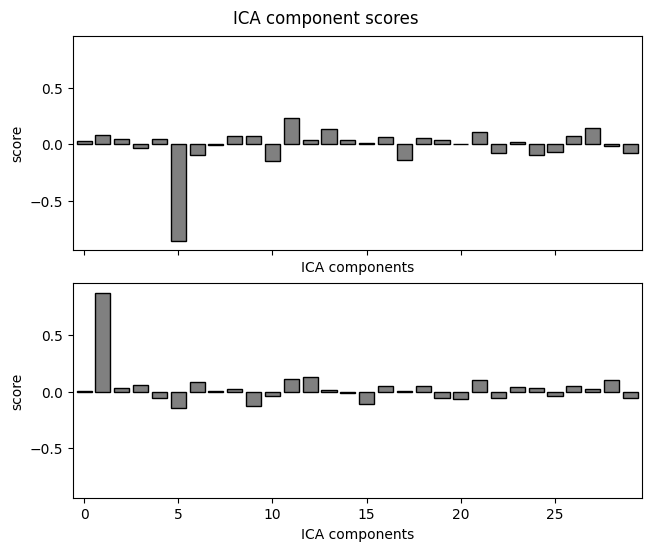

Subject 2 EOG-like ICA components: [np.int64(1), np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_preprocessed_ica_corrected_raw.fif
Processing subject 3: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 520 of 107008 (0.49%) samples, retaining 106488 (99.51%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 3 EOG-like ICA components: [np.int64(0), np.int64(3)]
Subject 3 EOG-like ICA components: [np.int64(0), np.int64(3)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_preprocessed_ica_corrected_raw.fif
Processing subject 4: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro some

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


Omitting 23444 of 158720 (14.77%) samples, retaining 135276 (85.23%) samples.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


Subject 4 EOG-like ICA components: [np.int64(0), np.int64(1), np.int64(4)]
Subject 4 EOG-like ICA components: [np.int64(0), np.int64(1), np.int64(4)]
Applying ICA to Raw instance


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_preprocessed_ica_corrected_raw.fif
Processing subject 5: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 109311 =      0.000 ... 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 1716 of 109312 (1.57%) samples, retaining 107596 (98.43%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 5 EOG-like ICA components: [np.int64(0)]
Subject 5 EOG-like ICA components: [np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_preprocessed_ica_corrected_raw.fif
Processing subject 6: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/P

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 6 EOG-like ICA components: [np.int64(2), np.int64(4)]
Subject 6 EOG-like ICA components: [np.int64(2), np.int64(4)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_preprocessed_ica_corrected_raw.fif
Processing subject 7: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro some

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 248 of 102656 (0.24%) samples, retaining 102408 (99.76%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 7 EOG-like ICA components: [np.int64(0), np.int64(1)]
Subject 7 EOG-like ICA components: [np.int64(0), np.int64(1)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_preprocessed_ica_corrected_raw.fif
Processing subject 8: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro some

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 1600 of 121856 (1.31%) samples, retaining 120256 (98.69%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 8 EOG-like ICA components: [np.int64(0), np.int64(17)]
Subject 8 EOG-like ICA components: [np.int64(0), np.int64(17)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_preprocessed_ica_corrected_raw.fif
Processing subject 9: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro so

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 9 EOG-like ICA components: [np.int64(0), np.int64(2)]
Subject 9 EOG-like ICA components: [np.int64(0), np.int64(2)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_preprocessed_ica_corrected_raw.fif
Processing subject 10: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro som

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 10 EOG-like ICA components: [np.int64(0), np.int64(2)]
Subject 10 EOG-like ICA components: [np.int64(0), np.int64(2)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_preprocessed_ica_corrected_raw.fif
Processing subject 11: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


Subject 11 EOG-like ICA components: [np.int64(1), np.int64(22), np.int64(21)]
Subject 11 EOG-like ICA components: [np.int64(1), np.int64(22), np.int64(21)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_preprocessed_ica_corrected_raw.fif
Processing subject 12: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 99839 =      0.000 ...   389.996 secs
Ready.
Reading 0 ... 99839  =  

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 12 EOG-like ICA components: [np.int64(1), np.int64(7)]
Subject 12 EOG-like ICA components: [np.int64(1), np.int64(7)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_preprocessed_ica_corrected_raw.fif
Processing subject 13: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 732 of 106496 (0.69%) samples, retaining 105764 (99.31%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 13 EOG-like ICA components: [np.int64(0), np.int64(5)]
Subject 13 EOG-like ICA components: [np.int64(0), np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_preprocessed_ica_corrected_raw.fif
Processing subject 14: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 1064 of 103680 (1.03%) samples, retaining 102616 (98.97%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 14 EOG-like ICA components: [np.int64(0), np.int64(13), np.int64(25)]
Subject 14 EOG-like ICA components: [np.int64(0), np.int64(13), np.int64(25)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_preprocessed_ica_corrected_raw.fif
Processing subject 15: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_ica_ready_raw.fif
Opening raw data file 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 1208 of 102656 (1.18%) samples, retaining 101448 (98.82%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 15 EOG-like ICA components: [np.int64(1), np.int64(7)]
Subject 15 EOG-like ICA components: [np.int64(1), np.int64(7)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_preprocessed_ica_corrected_raw.fif
Processing subject 16: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 33288 of 174080 (19.12%) samples, retaining 140792 (80.88%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 16 EOG-like ICA components: [np.int64(7), np.int64(14)]
Subject 16 EOG-like ICA components: [np.int64(7), np.int64(14)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_preprocessed_ica_corrected_raw.fif
Processing subject 17: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


Omitting 248 of 109056 (0.23%) samples, retaining 108808 (99.77%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 17 EOG-like ICA components: [np.int64(0), np.int64(7), np.int64(1)]
Subject 17 EOG-like ICA components: [np.int64(0), np.int64(7), np.int64(1)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_preprocessed_ica_corrected_raw.fif
Processing subject 18: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_ica_ready_raw.fif
Opening raw data file /con

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 984 of 114432 (0.86%) samples, retaining 113448 (99.14%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 18 EOG-like ICA components: [np.int64(0), np.int64(5)]
Subject 18 EOG-like ICA components: [np.int64(0), np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_preprocessed_ica_corrected_raw.fif
Processing subject 19: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 19 EOG-like ICA components: [np.int64(0)]
Subject 19 EOG-like ICA components: [np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_preprocessed_ica_corrected_raw.fif
Processing subject 20: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis File

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 4476 of 106752 (4.19%) samples, retaining 102276 (95.81%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 20 EOG-like ICA components: [np.int64(2), np.int64(4), np.int64(0)]
Subject 20 EOG-like ICA components: [np.int64(2), np.int64(4), np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_preprocessed_ica_corrected_raw.fif
Processing subject 21: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_ready_raw.fif
Opening raw data file /con

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 580 of 110848 (0.52%) samples, retaining 110268 (99.48%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 21 EOG-like ICA components: [np.int64(0), np.int64(2)]
Subject 21 EOG-like ICA components: [np.int64(0), np.int64(2)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_preprocessed_ica_corrected_raw.fif
Processing subject 22: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 1992 of 107776 (1.85%) samples, retaining 105784 (98.15%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 22 EOG-like ICA components: [np.int64(1), np.int64(7)]
Subject 22 EOG-like ICA components: [np.int64(1), np.int64(7)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_preprocessed_ica_corrected_raw.fif
Processing subject 23: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 804 of 102400 (0.79%) samples, retaining 101596 (99.21%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 23 EOG-like ICA components: [np.int64(0), np.int64(11), np.int64(2)]
Subject 23 EOG-like ICA components: [np.int64(0), np.int64(11), np.int64(2)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_preprocessed_ica_corrected_raw.fif
Processing subject 24: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_ica_ready_raw.fif
Opening raw data file /c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 1508 of 104448 (1.44%) samples, retaining 102940 (98.56%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 24 EOG-like ICA components: [np.int64(0)]
Subject 24 EOG-like ICA components: [np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_preprocessed_ica_corrected_raw.fif
Processing subject 25: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis File

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 2440 of 108800 (2.24%) samples, retaining 106360 (97.76%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 25 EOG-like ICA components: [np.int64(0), np.int64(17)]
Subject 25 EOG-like ICA components: [np.int64(0), np.int64(17)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_preprocessed_ica_corrected_raw.fif
Processing subject 26: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 10896 of 108032 (10.09%) samples, retaining 97136 (89.91%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 26 EOG-like ICA components: [np.int64(1), np.int64(3)]
Subject 26 EOG-like ICA components: [np.int64(1), np.int64(3)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_preprocessed_ica_corrected_raw.fif
Processing subject 27: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 5412 of 105984 (5.11%) samples, retaining 100572 (94.89%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 27 EOG-like ICA components: [np.int64(1), np.int64(4), np.int64(5)]
Subject 27 EOG-like ICA components: [np.int64(1), np.int64(4), np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_preprocessed_ica_corrected_raw.fif
Processing subject 28: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_ica_ready_raw.fif
Opening raw data file /con

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 28 EOG-like ICA components: [np.int64(2), np.int64(0)]
Subject 28 EOG-like ICA components: [np.int64(2), np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_preprocessed_ica_corrected_raw.fif
Processing subject 29: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 21504 of 114944 (18.71%) samples, retaining 93440 (81.29%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 29 EOG-like ICA components: [np.int64(12)]
Subject 29 EOG-like ICA components: [np.int64(12)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_preprocessed_ica_corrected_raw.fif
Processing subject 30: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Fi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 24828 of 116992 (21.22%) samples, retaining 92164 (78.78%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 30 EOG-like ICA components: [np.int64(5)]
Subject 30 EOG-like ICA components: [np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_preprocessed_ica_corrected_raw.fif
Processing subject 31: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis File

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 520 of 103680 (0.50%) samples, retaining 103160 (99.50%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 31 EOG-like ICA components: [np.int64(0), np.int64(12)]
Subject 31 EOG-like ICA components: [np.int64(0), np.int64(12)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_preprocessed_ica_corrected_raw.fif
Processing subject 32: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 32 EOG-like ICA components: [np.int64(0), np.int64(6), np.int64(18)]
Subject 32 EOG-like ICA components: [np.int64(0), np.int64(6), np.int64(18)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_preprocessed_ica_corrected_raw.fif
Processing subject 33: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_ica_ready_raw.fif
Opening raw data file /c

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 33 EOG-like ICA components: [np.int64(0)]
Subject 33 EOG-like ICA components: [np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_preprocessed_ica_corrected_raw.fif
Processing subject 34: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis File

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 260 of 107776 (0.24%) samples, retaining 107516 (99.76%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 34 EOG-like ICA components: [np.int64(2), np.int64(5)]
Subject 34 EOG-like ICA components: [np.int64(2), np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_preprocessed_ica_corrected_raw.fif
Processing subject 35: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 2080 of 104704 (1.99%) samples, retaining 102624 (98.01%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 35 EOG-like ICA components: [np.int64(2), np.int64(14), np.int64(18)]
Subject 35 EOG-like ICA components: [np.int64(2), np.int64(14), np.int64(18)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_preprocessed_ica_corrected_raw.fif
Processing subject 36: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_ready_raw.fif
Opening raw data file 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 296 of 100352 (0.29%) samples, retaining 100056 (99.71%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


Subject 36 EOG-like ICA components: [np.int64(1), np.int64(9)]
Subject 36 EOG-like ICA components: [np.int64(1), np.int64(9)]
Applying ICA to Raw instance


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_preprocessed_ica_corrected_raw.fif
Processing subject 37: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_ica_ready_raw.fif...
    Range : 0 ... 109311 =      0.000 ...

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 296 of 109312 (0.27%) samples, retaining 109016 (99.73%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandw

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 37 EOG-like ICA components: [np.int64(0)]
Subject 37 EOG-like ICA components: [np.int64(0)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_preprocessed_ica_corrected_raw.fif
Processing subject 38: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis File

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 4664 of 135936 (3.43%) samples, retaining 131272 (96.57%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition band

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 38 EOG-like ICA components: [np.int64(0), np.int64(3)]
Subject 38 EOG-like ICA components: [np.int64(0), np.int64(3)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_preprocessed_ica_corrected_raw.fif
Processing subject 39: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro s

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 15976 of 130304 (12.26%) samples, retaining 114328 (87.74%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 39 EOG-like ICA components: [np.int64(1), np.int64(11)]
Subject 39 EOG-like ICA components: [np.int64(1), np.int64(11)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 2 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_preprocessed_ica_corrected_raw.fif
Processing subject 40: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_ica_ready_raw.fif
Opening raw data file /content/drive/MyDrive/neuro

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 63744 of 126976 (50.20%) samples, retaining 63232 (49.80%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2560 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition ban

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Subject 40 EOG-like ICA components: [np.int64(5)]
Subject 40 EOG-like ICA components: [np.int64(5)]
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_ica_corrected_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_ica_corrected_raw.fif
[done]
Saved corrected raw: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_preprocessed_ica_corrected_raw.fif

===== ICA 排除總表 =====
Subject 01: [np.int64(5), np.int64(7), np.int64(1)]
Subject 02: [np.int64(1), np.int64(5)]
Subject 03: [np.int64(0), np.int64(3)]
Subject 04: [np.int64(0), np.int64(1), np.int64(4)]
Subject 05: [np.int64(0)]
Subject 06: [

In [ ]:
subject_nums = range(1, 41)
excluded_dict = {}

for subject_id in subject_nums:
    fif_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_{subject_id:02d}_preprocessed_ica_ready_raw.fif'
    ica_path = fif_path.replace('_ica_ready_raw', '_ica')
    print(f'Processing subject {subject_id}: {fif_path}')

    # 載入原始raw(含EOG)與ICA
    raw = mne.io.read_raw_fif(fif_path, preload=True)
    ica = mne.preprocessing.read_ica(ica_path)

    # 偵測EOG成分
    eog_inds, eog_scores = ica.find_bads_eog(raw, threshold=3.0)
    print(f"Subject {subject_id} EOG-like ICA components:", eog_inds)

    # 可以畫出分數（只畫第一位即可）
    if subject_id == 2:
        ica.plot_scores(eog_scores)
        ica.plot_components(picks=eog_inds, inst=raw)  # 可選，看哪些component像EOG

    # 記錄
    excluded_dict[subject_id] = eog_inds
    print(f"Subject {subject_id} EOG-like ICA components: {eog_inds}")

    # 自動排除偵測到的EOG ICA
    ica.exclude = eog_inds

    # 套用 ICA，產生已移除 component 的 raw 資料
    raw_corrected = ica.apply(raw.copy())

    # 儲存新檔案
    out_path = fif_path.replace('_ica_ready_raw', '_ica_corrected_raw')
    raw_corrected.save(out_path, overwrite=True)
    print(f'Saved corrected raw: {out_path}')

    # === 印出總表 ===
print("\n===== ICA 排除總表 =====")
for subj_id, comps in excluded_dict.items():
 print(f"Subject {subj_id:02d}: {comps}")

1. eog_inds 給你的是自動判斷為「可能是眼動/眨眼」的 ICA component 編號
這些 index 通常已經是建議你「應該排除」的成分。
eog_inds 通常會是 0~3 個（如果一切正常）。
你可以直接用 ica.exclude = eog_inds，然後應用 ICA。
2. ica.plot_scores(eog_scores) 會畫分數條（score bar plot）
Y 軸是「成分與 EOG 相似度分數」（通常是 correlation 分數）。
X 軸是 ICA component 的 index。
分數高的代表此 ICA component 與 EOG channel 的相關性高，越有可能是眼動/眨眼。
判斷建議：

看 eog_scores 圖，通常分數最高的前1-2個成分就是你要排除的。
自動選到的（eog_inds）通常是分數最高的那幾個，你也可以人工微調：
如果有明顯的跳躍（分數斷層），通常在斷層以上的都可以排除。
如果分數都很低（<0.2），代表資料本身 EOG 污染不重，可能不用排除。


##加上雙極通道（HEOG 與 VEOG）

為了準確偵測、校正與分析眼動雜訊

In [ ]:
def add_bipolar_channel(raw, new_ch_name, ch1, ch2):
    # 若已存在同名 channel，先刪除避免衝突
    if new_ch_name in raw.ch_names:
        raw.drop_channels([new_ch_name])

    data1 = raw.get_data(picks=ch1)
    data2 = raw.get_data(picks=ch2)
    bipolar_data = data1 - data2

    info = mne.create_info([new_ch_name], raw.info['sfreq'], ch_types='eeg')
    bipolar_raw = mne.io.RawArray(bipolar_data, info)

    raw.add_channels([bipolar_raw], force_update_info=True)
    return raw

subject_nums = range(1, 41)

for subject_id in subject_nums:
    # 1. 檔案路徑
    fif_path = f'/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_{subject_id:02d}_preprocessed_ica_corrected_raw.fif'
    print(f'Processing subject {subject_id}: {fif_path}')

    # 2. 讀檔
    raw = mne.io.read_raw_fif(fif_path, preload=True)

    # 3. 加入雙極通道
    try:
        raw = add_bipolar_channel(raw, 'HEOG', 'HEOG_left', 'HEOG_right')
    except Exception as e:
        print(f"Subject {subject_id} - 無法建立 HEOG: {e}")
    try:
        raw = add_bipolar_channel(raw, 'VEOG', 'VEOG_lower', 'FP2')
    except Exception as e:
        print(f"Subject {subject_id} - 無法建立 VEOG: {e}")

    # 4. 設定 montage，on_missing='ignore' 以防有些通道不在 montage 上
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage, on_missing='ignore')

    # 5. 儲存新檔案
    out_path = fif_path.replace('_ica_corrected_raw', '_ica_corrected_bipolar_raw')
    raw.save(out_path, overwrite=True)
    print(f'Saved with bipolar channels: {out_path}')

Processing subject 1: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...
Creating RawArray with float64 data, n_channels=1, n_times=146432
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=146432
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Overwriting existing file.
Writing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_bipolar_raw.fif
Closing /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainha

#5_Elist_Bin_Epoch.m

遇到的困難重點
1.  沒有行為反應資料表（RT/correctness），所以沒辦法根據反應篩選正確/錯誤、RT區間等。
2.  但你有正確的事件碼(event_id/event_dict)，可以分辨「related/unrelated」等條件。
3.  你希望epoch 切分為 -0.2~0.8s（刺激為 0）並 baseline 到前200ms。


In [ ]:
# ====== 1. 設定受試者列表與資料夾路徑 ======
subject_list = [f"{i:02d}" for i in range(1, 41)]  # 01, 02, ..., 40
base_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round'


# ====== 2. epoching 參數與事件對照表 ======
event_id = {
    '111': 1, '112': 2, '121': 3, '122': 4,
    '201': 5, '202': 6, '211': 7, '212': 8,
    '221': 9, '222': 10
}
# 注意！bin_dict 直接用字串 event code
bin_dict = {
    'related': ['211', '212'],
    'unrelated': ['221', '222'],
}
tmin, tmax = -0.2, 0.8

# ====== 3. 批次處理每個受試者 ======
for subj in subject_list:
    print(f'=== 處理受試者: N400_{subj} ===')
    fif_path = os.path.join(base_dir, f'N400_{subj}_preprocessed_ica_corrected_raw.fif')
    if not os.path.exists(fif_path):
        print(f'檔案不存在: {fif_path}')
        continue

    # 讀 raw
    raw_epo = mne.io.read_raw_fif(fif_path, preload=True)
    print("所有 annotation descriptions:", [a['description'] for a in raw_epo.annotations])

    # 取得 events
    events, _ = mne.events_from_annotations(raw_epo)
    print('events.shape:', events.shape)
    print('前10個 events:', events[:10])
    print('annotation 標籤:', set([a['description'] for a in raw_epo.annotations]))

    # 切分全事件 epochs
    epochs = mne.Epochs(raw_epo, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=(tmin, 0), preload=True)

    # 用 bin_dict 篩選條件（直接用字串 event code）
    epochs_related = epochs[bin_dict['related']]
    epochs_unrelated = epochs[bin_dict['unrelated']]

    print(f"Related: {len(epochs_related)} epochs")
    print(f"Unrelated: {len(epochs_unrelated)} epochs")

    # 儲存
    related_out = os.path.join(base_dir, f'N400_{subj}_related-epo.fif')
    unrelated_out = os.path.join(base_dir, f'N400_{subj}_unrelated-epo.fif')
    epochs_related.save(related_out, overwrite=True)
    epochs_unrelated.save(unrelated_out, overwrite=True)
    print(f'儲存: {related_out}, {unrelated_out}\n')


=== 處理受試者: N400_01 ===
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...
所有 annotation descriptions: [np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('202'), np.str_('202'), np.str_('112'), np.str_('212'), np.str_('201'), np.str_('122'), np.str_('222'), np.str_('201'), np.str_('122'), np.str_('222'), np.str_('201'), np.str

In [ ]:
# ====== 3. 批次處理每個受試者 ======
for subj in subject_list:
    print(f'=== 處理受試者: N400_{subj} ===')
    fif_path = os.path.join(base_dir, f'N400_{subj}_preprocessed_ica_corrected_raw.fif')
    if not os.path.exists(fif_path):
        print(f'檔案不存在: {fif_path}')
        continue

    # 讀 raw
    raw_epo = mne.io.read_raw_fif(fif_path, preload=True)

    # 取得 events
    print("所有 annotation descriptions:", [a['description'] for a in raw_epo.annotations])
    events, _ = mne.events_from_annotations(raw_epo)

    # 先確認 events 正確
    print('events.shape:', events.shape)
    print('前10個 events:', events[:10])
    print('annotation 標籤:', set([a['description'] for a in raw_epo.annotations]))

    # 切分全事件 epochs
    epochs = mne.Epochs(raw_epo, events, event_id=event_id, tmin=tmin, tmax=tmax, preload=True)

    # 建立 related/unrelated epochs
    epochs_related = mne.Epochs(
        raw_epo, events, event_id=bin_dict['related'],
        tmin=tmin, tmax=tmax, baseline=(tmin, 0), preload=True,
        reject=None
    )
    epochs_unrelated = mne.Epochs(
        raw_epo, events, event_id=bin_dict['unrelated'],
        tmin=tmin, tmax=tmax, baseline=(tmin, 0), preload=True,
        reject=None
    )

    # 用 bin_dict 篩選條件
    epochs_related = epochs[bin_dict['related']]
    epochs_unrelated = epochs[bin_dict['unrelated']]

    print(f"Related: {len(epochs_related)} epochs")
    print(f"Unrelated: {len(epochs_unrelated)} epochs")
    print(raw_epo.annotations)

    # 儲存
    related_out = os.path.join(base_dir, f'N400_{subj}_related-epo.fif')
    unrelated_out = os.path.join(base_dir, f'N400_{subj}_unrelated-epo.fif')
    epochs_related.save(related_out, overwrite=True)
    epochs_unrelated.save(unrelated_out, overwrite=True)
    print(f'儲存: {related_out}, {unrelated_out}\n')

=== 處理受試者: N400_01 ===
Opening raw data file /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_preprocessed_ica_corrected_raw.fif...
    Range : 0 ... 146431 =      0.000 ...   571.996 secs
Ready.
Reading 0 ... 146431  =      0.000 ...   571.996 secs...
所有 annotation descriptions: [np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('BAD_artifact'), np.str_('202'), np.str_('202'), np.str_('112'), np.str_('212'), np.str_('201'), np.str_('122'), np.str_('222'), np.str_('201'), np.str_('122'), np.str_('222'), np.str_('201'), np.str

In [ ]:
print(f"Subject {subject_id}: Related原始trial數 = {len(epochs_related)}, Unrelated原始trial數 = {len(epochs_unrelated)}")

Subject 40: Related原始trial數 = 2, Unrelated原始trial數 = 2


In [ ]:
print(epochs_related.event_id)
print(epochs_unrelated.event_id)
print("Events in epochs_related:", epochs_related.events[:10])
print("Events in epochs_unrelated:", epochs_unrelated.events[:10])

{'111': 1, '202': 6}
{'201': 5, '211': 7}
Events in epochs_related: [[19370     0     6]
 [19488     0     1]]
Events in epochs_unrelated: [[19821     0     7]
 [20031     0     5]]


In [ ]:
print("raw.annotations:", raw.annotations)

raw.annotations: <Annotations | 4887 segments: 111 (30), 112 (30), 121 (30), 122 (30), 201 ...>


In [ ]:
print(f"Subject {subject_id}: Related初始trial數 = {len(epochs_related)}, Unrelated初始trial數 = {len(epochs_unrelated)}")

Subject 40: Related初始trial數 = 2, Unrelated初始trial數 = 2


#6_Artifact_Rejection

In [ ]:

# ===== 1. 參數設定 =====
data_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/N400 Analysis Files/N400/EEG_ERP_Processing'
input_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'
output_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'
os.makedirs(output_dir, exist_ok=True)

interp_excel = os.path.join(data_dir, 'Interpolate_Channels_N400.xlsx')
svt_excel = os.path.join(data_dir, 'AR_Parameters_for_SVT_CRAP_N400.xlsx')
mw_crap_excel = os.path.join(data_dir, 'AR_Parameters_for_MW_CRAP_N400.xlsx')
mw_blink_excel = os.path.join(data_dir, 'AR_Parameters_for_MW_Blinks_N400.xlsx')
sl_heog_stim_excel = os.path.join(data_dir, 'AR_Parameters_for_SL_HEOG_Stim_Pres_N400.xlsx')
sl_heog_excel = os.path.join(data_dir, 'AR_Parameters_for_SL_HEOG_N400.xlsx')

interp_df = pd.read_excel(interp_excel, engine='openpyxl')
svt_df = pd.read_excel(svt_excel, engine='openpyxl')
mw_crap_df = pd.read_excel(mw_crap_excel, engine='openpyxl')
mw_blink_df = pd.read_excel(mw_blink_excel, engine='openpyxl')
sl_heog_stim_df = pd.read_excel(sl_heog_stim_excel, engine='openpyxl')
sl_heog_df = pd.read_excel(sl_heog_excel, engine='openpyxl')

def interpolate_epochs(epochs_related, epochs_unrelated, badchans_str):
    ignore = ['HEOG', 'VEOG', 'EOG', 'M1', 'M2']
    if isinstance(badchans_str, str) and badchans_str.lower() != 'none':
        badchans = [ch.strip() for ch in badchans_str.split(',')]
        badchans = [ch for ch in badchans if ch not in ignore]
        if set(badchans) & set(epochs_related.ch_names):
            epochs_related.info['bads'] = badchans
            epochs_related.interpolate_bads(reset_bads=True, mode='accurate')
        if set(badchans) & set(epochs_unrelated.ch_names):
            epochs_unrelated.info['bads'] = badchans
            epochs_unrelated.interpolate_bads(reset_bads=True, mode='accurate')
    return epochs_related, epochs_unrelated

def apply_svt_crap(epochs, row_svt):
    channels = row_svt[1]
    if isinstance(channels, str) and channels.lower() == 'default':
        picks = mne.pick_types(epochs.info, eeg=True, exclude=['HEOG', 'VEOG'])
    else:
        picks = [epochs.ch_names[int(idx)-1] for idx in channels.split(',')]
    vmin, vmax = float(row_svt[2]), float(row_svt[3])
    tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000
    reject_mask = np.full(len(epochs), False)
    for i, ep in enumerate(epochs.get_data()):
        sfreq = epochs.info['sfreq']
        t0_idx = int((tmin - epochs.tmin) * sfreq)
        t1_idx = int((tmax - epochs.tmin) * sfreq)
        d = ep[picks, t0_idx:t1_idx]
        if (d.max() > vmax*1e-6) or (d.min() < vmin*1e-6):
            reject_mask[i] = True
    return epochs[~reject_mask]

def apply_mw_crap(epochs, row_params):
    channels = row_params['Channel(s)']
    sfreq = epochs.info['sfreq']
    if isinstance(channels, str) and channels.lower() == 'default':
        picks = mne.pick_types(epochs.info, eeg=True, exclude=['HEOG', 'VEOG'])
    else:
        picks = [epochs.ch_names[int(idx)-1] for idx in channels.split(',')]
    thresh = float(row_params['Threshold'])
    tmin = float(row_params['Time Window Minimum']) / 1000
    tmax = float(row_params['Time Window Maximum']) / 1000
    win_size = int(float(row_params['Window Size']) * sfreq / 1000)
    win_step = int(float(row_params['Window Step']) * sfreq / 1000)
    reject_mask = np.full(len(epochs), False)
    for i, ep in enumerate(epochs.get_data()):
        t0_idx = int((tmin - epochs.tmin) * sfreq)
        t1_idx = int((tmax - epochs.tmin) * sfreq)
        for ch in picks:
            data = ep[ch, t0_idx:t1_idx] * 1e6
            for k in range(0, data.shape[-1] - win_size + 1, win_step):
                segment = data[k:k+win_size]
                if np.ptp(segment) > thresh:
                    reject_mask[i] = True
                    break
    return epochs[~reject_mask]

def reject_epochs_by_channel(epochs, channel_raw, thresh, tmin, tmax, win_size, win_step):
    sfreq = epochs.info['sfreq']
    try:
        ch_idx = int(channel_raw) - 1
        channel = epochs.ch_names[ch_idx]
    except:
        channel = channel_raw
    if channel not in epochs.ch_names:
        print(f"[WARNING] Channel {channel} not found in epoch data.")
        return epochs
    ch_idx = epochs.ch_names.index(channel)
    reject_mask = np.full(len(epochs), False)
    for i, ep in enumerate(epochs.get_data()):
        t0_idx = int((tmin - epochs.tmin) * sfreq)
        t1_idx = int((tmax - epochs.tmin) * sfreq)
        data = ep[ch_idx, t0_idx:t1_idx]*1e6
        for k in range(0, data.shape[-1] - win_size + 1, win_step):
            segment = data[k:k+win_size]
            if np.ptp(segment) > thresh:
                reject_mask[i] = True
                break
    return epochs[~reject_mask]

def reject_epochs_by_step_like(epochs, channel_raw, thresh, tmin, tmax, win_size, win_step):
    sfreq = epochs.info['sfreq']
    try:
        ch_idx = int(channel_raw) - 1
        channel = epochs.ch_names[ch_idx]
    except:
        channel = channel_raw
    if channel not in epochs.ch_names:
        print(f"[WARNING] Channel {channel} not found in epoch data.")
        return epochs
    ch_idx = epochs.ch_names.index(channel)
    reject_mask = np.full(len(epochs), False)
    for i, ep in enumerate(epochs.get_data()):
        t0_idx = int((tmin - epochs.tmin) * sfreq)
        t1_idx = int((tmax - epochs.tmin) * sfreq)
        data = ep[ch_idx, t0_idx:t1_idx] * 1e6
        for k in range(0, data.shape[-1] - win_size + 1, win_step):
            segment = data[k:k+win_size]
            step_val = np.abs(np.mean(segment[:win_size//2]) - np.mean(segment[win_size//2:]))
            if step_val > thresh:
                reject_mask[i] = True
                break
    return epochs[~reject_mask]

# ======= 主程式 =======
for subject_id in range(1, 41):
    print(f"\n===== Processing subject {subject_id} =====")
    sid = f"{subject_id:02d}"
    rel_path = os.path.join(input_dir, f'N400_{sid}_related-epo.fif')
    unrel_path = os.path.join(input_dir, f'N400_{sid}_unrelated-epo.fif')
    if not (os.path.exists(rel_path) and os.path.exists(unrel_path)):
        print(f"Missing epochs for subject {subject_id}, skipping...")
        continue

    epochs_related = mne.read_epochs(rel_path, preload=True)
    epochs_unrelated = mne.read_epochs(unrel_path, preload=True)

    # [3] Interpolate bad channels
    row_interp = interp_df[interp_df.iloc[:,0].astype(str) == str(subject_id)]
    badchans_str = row_interp.iloc[0,1] if not row_interp.empty else None
    epochs_related, epochs_unrelated = interpolate_epochs(epochs_related, epochs_unrelated, badchans_str)

    # [4] SVT artifact rejection
    row_svt = svt_df[svt_df.iloc[:,0].astype(str) == str(subject_id)]
    if not row_svt.empty:
        epochs_related = apply_svt_crap(epochs_related, row_svt.iloc[0])
        epochs_unrelated = apply_svt_crap(epochs_unrelated, row_svt.iloc[0])

    # [5] Moving Window Peak-to-Peak artifact rejection (CRAP)
    row_mw = mw_crap_df[mw_crap_df.iloc[:,0].astype(str) == str(subject_id)]
    if not row_mw.empty:
        epochs_related = apply_mw_crap(epochs_related, row_mw.iloc[0])
        epochs_unrelated = apply_mw_crap(epochs_unrelated, row_mw.iloc[0])

    # [6] Blink artifact rejection
    row_blink = mw_blink_df[mw_blink_df.iloc[:,0].astype(str) == str(subject_id)]
    if not row_blink.empty:
        channel = row_blink.iloc[0]['Channel(s)']
        thresh = float(row_blink.iloc[0]['Threshold'])
        tmin = float(row_blink.iloc[0]['Time Window Minimum']) / 1000
        tmax = float(row_blink.iloc[0]['Time Window Maximum']) / 1000
        sfreq = epochs_related.info['sfreq']
        win_size = int(float(row_blink.iloc[0]['Window Size']) * sfreq / 1000)
        win_step = int(float(row_blink.iloc[0]['Window Step']) * sfreq / 1000)
        epochs_related = reject_epochs_by_channel(epochs_related, channel, thresh, tmin, tmax, win_size, win_step)
        epochs_unrelated = reject_epochs_by_channel(epochs_unrelated, channel, thresh, tmin, tmax, win_size, win_step)

    # [7] Step-like HEOG artifact rejection (stimulus presentation)
    row_sl_heog_stim = sl_heog_stim_df[sl_heog_stim_df.iloc[:,0].astype(str) == str(subject_id)]
    if not row_sl_heog_stim.empty:
        channel = row_sl_heog_stim.iloc[0]['Channel(s)']
        thresh = float(row_sl_heog_stim.iloc[0]['Threshold'])
        tmin = float(row_sl_heog_stim.iloc[0]['Time Window Minimum']) / 1000
        tmax = float(row_sl_heog_stim.iloc[0]['Time Window Maximum']) / 1000
        sfreq = epochs_related.info['sfreq']
        win_size = int(float(row_sl_heog_stim.iloc[0]['Window Size']) * sfreq / 1000)
        win_step = int(float(row_sl_heog_stim.iloc[0]['Window Step']) * sfreq / 1000)
        epochs_related = reject_epochs_by_step_like(epochs_related, channel, thresh, tmin, tmax, win_size, win_step)
        epochs_unrelated = reject_epochs_by_step_like(epochs_unrelated, channel, thresh, tmin, tmax, win_size, win_step)

    # [8] Horizontal eye movement artifact rejection (all epochs, ICA-corrected HEOG)
    row_sl_heog = sl_heog_df[sl_heog_df.iloc[:,0].astype(str) == str(subject_id)]
    if not row_sl_heog.empty:
        channel = row_sl_heog.iloc[0]['Channel(s)']
        thresh = float(row_sl_heog.iloc[0]['Threshold'])
        tmin = float(row_sl_heog.iloc[0]['Time Window Minimum']) / 1000
        tmax = float(row_sl_heog.iloc[0]['Time Window Maximum']) / 1000
        sfreq = epochs_related.info['sfreq']
        win_size = int(float(row_sl_heog.iloc[0]['Window Size']) * sfreq / 1000)
        win_step = int(float(row_sl_heog.iloc[0]['Window Step']) * sfreq / 1000)
        epochs_related = reject_epochs_by_step_like(epochs_related, channel, thresh, tmin, tmax, win_size, win_step)
        epochs_unrelated = reject_epochs_by_step_like(epochs_unrelated, channel, thresh, tmin, tmax, win_size, win_step)

    # [9] 儲存
    sid = f"{subject_id:02d}"
    related_path = os.path.join(output_dir, f'N400_{sid}_related_epo_clean-epo.fif')
    unrelated_path = os.path.join(output_dir, f'N400_{sid}_unrelated_epo_clean-epo.fif')
    epochs_related.save(related_path, overwrite=True)
    epochs_unrelated.save(unrelated_path, overwrite=True)

    print(f"Subject {subject_id}: Artifact rejection done.")
    print(f"剩餘 related epochs 數量：{len(epochs_related)}")
    print(f"剩餘 unrelated epochs 數量：{len(epochs_unrelated)}")


===== Processing subject 1 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 1: Artifact rejection done.
剩餘 related epochs 數量：45
剩餘 unrelated epochs 數量：41

===== Processing subject 2 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_02_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 2: Artifact rejection done.
剩餘 related epochs 數量：54
剩餘 unrelated epochs 數量：54

===== Processing subject 3 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_03_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 3: Artifact rejection done.
剩餘 related epochs 數量：20
剩餘 unrelated epochs 數量：23

===== Processing subject 4 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_04_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 4: Artifact rejection done.
剩餘 related epochs 數量：26
剩餘 unrelated epochs 數量：39

===== Processing subject 5 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_05_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Subject 5: Artifact rejection done.
剩餘 related epochs 數量：1
剩餘 unrelated epochs 數量：4

===== Processing subject 6 =====
Reading /content/drive/MyDrive/neu

<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 6: Artifact rejection done.
剩餘 related epochs 數量：13
剩餘 unrelated epochs 數量：21

===== Processing subject 7 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_07_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 7: Artifact rejection done.
剩餘 related epochs 數量：25
剩餘 unrelated epochs 數量：54

===== Processing subject 8 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_08_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 8: Artifact rejection done.
剩餘 related epochs 數量：19
剩餘 unrelated epochs 數量：23

===== Processing subject 9 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_09_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Subject 9: Artifact rejection done.
剩餘 related epochs 數量：2
剩餘 unrelated epochs 數量：2

===== Processing subject 10 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_10_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 10: Artifact rejection done.
剩餘 related epochs 數量：48
剩餘 unrelated epochs 數量：48

===== Processing subject 11 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_11_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 11: Artifact rejection done.
剩餘 related epochs 數量：55
剩餘 unrelated epochs 數量：52

===== Processing subject 12 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 12: Artifact rejection done.
剩餘 related epochs 數量：60
剩餘 unrelated epochs 數量：60

===== Processing subject 13 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_13_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 13: Artifact rejection done.
剩餘 related epochs 數量：35
剩餘 unrelated epochs 數量：32

===== Processing subject 14 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_14_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 14: Artifact rejection done.
剩餘 related epochs 數量：54
剩餘 unrelated epochs 數量：57

===== Processing subject 15 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_15_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 15: Artifact rejection done.
剩餘 related epochs 數量：53
剩餘 unrelated epochs 數量：50

===== Processing subject 16 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_16_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 16: Artifact rejection done.
剩餘 related epochs 數量：48
剩餘 unrelated epochs 數量：53

===== Processing subject 17 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_17_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 17: Artifact rejection done.
剩餘 related epochs 數量：19
剩餘 unrelated epochs 數量：20

===== Processing subject 18 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_18_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 18: Artifact rejection done.
剩餘 related epochs 數量：7
剩餘 unrelated epochs 數量：18

===== Processing subject 19 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_19_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 19: Artifact rejection done.
剩餘 related epochs 數量：60
剩餘 unrelated epochs 數量：60

===== Processing subject 20 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_20_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 20: Artifact rejection done.
剩餘 related epochs 數量：28
剩餘 unrelated epochs 數量：35

===== Processing subject 21 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_21_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 21: Artifact rejection done.
剩餘 related epochs 數量：28
剩餘 unrelated epochs 數量：44

===== Processing subject 22 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_22_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 22: Artifact rejection done.
剩餘 related epochs 數量：60
剩餘 unrelated epochs 數量：60

===== Processing subject 23 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_23_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 23: Artifact rejection done.
剩餘 related epochs 數量：41
剩餘 unrelated epochs 數量：47

===== Processing subject 24 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_24_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 24: Artifact rejection done.
剩餘 related epochs 數量：25
剩餘 unrelated epochs 數量：39

===== Processing subject 25 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_25_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 25: Artifact rejection done.
剩餘 related epochs 數量：39
剩餘 unrelated epochs 數量：38

===== Processing subject 26 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_26_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 26: Artifact rejection done.
剩餘 related epochs 數量：45
剩餘 unrelated epochs 數量：38

===== Processing subject 27 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_27_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 27: Artifact rejection done.
剩餘 related epochs 數量：36
剩餘 unrelated epochs 數量：38

===== Processing subject 28 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_28_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 28: Artifact rejection done.
剩餘 related epochs 數量：24
剩餘 unrelated epochs 數量：23

===== Processing subject 29 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_29_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 29: Artifact rejection done.
剩餘 related epochs 數量：52
剩餘 unrelated epochs 數量：51

===== Processing subject 30 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_30_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
57 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 30: Artifact rejection done.
剩餘 related epochs 數量：47
剩餘 unrelated epochs 數量：47

===== Processing subject 31 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_31_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 31: Artifact rejection done.
剩餘 related epochs 數量：27
剩餘 unrelated epochs 數量：25

===== Processing subject 32 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_32_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 32: Artifact rejection done.
剩餘 related epochs 數量：18
剩餘 unrelated epochs 數量：29

===== Processing subject 33 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_33_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 33: Artifact rejection done.
剩餘 related epochs 數量：55
剩餘 unrelated epochs 數量：58

===== Processing subject 34 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_34_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 34: Artifact rejection done.
剩餘 related epochs 數量：37
剩餘 unrelated epochs 數量：40

===== Processing subject 35 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_35_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 35: Artifact rejection done.
剩餘 related epochs 數量：58
剩餘 unrelated epochs 數量：60

===== Processing subject 36 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_36_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 36: Artifact rejection done.
剩餘 related epochs 數量：7
剩餘 unrelated epochs 數量：10

===== Processing subject 37 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_37_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 37: Artifact rejection done.
剩餘 related epochs 數量：7
剩餘 unrelated epochs 數量：15

===== Processing subject 38 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_38_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 38: Artifact rejection done.
剩餘 related epochs 數量：50
剩餘 unrelated epochs 數量：49

===== Processing subject 39 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_39_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
58 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 39: Artifact rejection done.
剩餘 related epochs 數量：31
剩餘 unrelated epochs 數量：25

===== Processing subject 40 =====
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_related-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_40_unrelated-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-121-be4fc1d6331c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  channels = row_svt[1]
<ipython-input-121-be4fc1d6331c>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vmin, vmax = float(row_svt[2]), float(row_svt[3])
<ipython-input-121-be4fc1d6331c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmin, tmax = float(row_svt[4])/1000, float(row_svt[5])/1000


Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Subject 40: Artifact rejection done.
剩餘 related epochs 數量：23
剩餘 unrelated epochs 數量：33


#7_Average_ERPs

In [ ]:
from scipy.signal import butter, filtfilt

In [ ]:

def butterworth_lowpass(evoked, cutoff=20, fs=None, order=8):
    if fs is None:
        fs = evoked.info['sfreq']
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    data_filt = filtfilt(b, a, evoked.data, axis=-1)
    evoked_filt = evoked.copy()
    evoked_filt.data = data_filt
    return evoked_filt

for subject_id in range(1, 41):
    print(f"\n=== Processing subject {subject_id:02d} ===")
    subject_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'
    sid = f"{subject_id:02d}"
    epochs_related_path = os.path.join(subject_dir, f'N400_{sid}_related_epo_clean-epo.fif')
    epochs_unrelated_path = os.path.join(subject_dir, f'N400_{sid}_unrelated_epo_clean-epo.fif')
    out_csv_path = os.path.join(subject_dir, f'{subject_id}_AR_Percentages_N400.csv')

    print(f"Subject {subject_id}: Related剩餘trial數 = {len(epochs_related)}, Unrelated剩餘trial數 = {len(epochs_unrelated)}")
    if len(epochs_related) == 0 or len(epochs_unrelated) == 0:
        print(f"Subject {subject_id}: No epochs left after rejection, skipping...")
        continue

    if not (os.path.exists(epochs_related_path) and os.path.exists(epochs_unrelated_path)):
        print(f"Missing cleaned epochs for subject {subject_id}, skipping...")
        continue

    # ===== 2. 載入 epochs（已做artifact rejection）=====
    epochs_related = mne.read_epochs(epochs_related_path, preload=True)
    epochs_unrelated = mne.read_epochs(epochs_unrelated_path, preload=True)
    n_trials_total_related = len(epochs_related.selection)
    n_trials_total_unrelated = len(epochs_unrelated.selection)

    # ===== 3. ERP平均 =====
    evoked_related = epochs_related.average()
    evoked_unrelated = epochs_unrelated.average()

    # ===== 4. 計算 trial rejection 百分比 =====
    n_trials_orig_related = len(epochs_related.drop_log)
    n_trials_orig_unrelated = len(epochs_unrelated.drop_log)
    n_rej_related = sum([len(d) > 0 for d in epochs_related.drop_log])
    n_rej_unrelated = sum([len(d) > 0 for d in epochs_unrelated.drop_log])
    n_accepted_related = n_trials_orig_related - n_rej_related
    n_accepted_unrelated = n_trials_orig_unrelated - n_rej_unrelated
    percent_rej_related = n_rej_related / n_trials_orig_related * 100 if n_trials_orig_related > 0 else np.nan
    percent_rej_unrelated = n_rej_unrelated / n_trials_orig_unrelated * 100 if n_trials_orig_unrelated > 0 else np.nan
    total_accepted = n_accepted_related + n_accepted_unrelated
    total_rejected = n_rej_related + n_rej_unrelated
    total_trials = n_trials_orig_related + n_trials_orig_unrelated
    total_percent_rej = total_rejected / total_trials * 100 if total_trials > 0 else np.nan

    # ===== 5. 儲存 trial rejection 統計 =====
    with open(out_csv_path, 'w') as f:
        f.write('SubID,Bin,Accepted,Rejected,Total Percent Rejected\n')
        f.write(f'{subject_id},Total,{total_accepted},{total_rejected},{total_percent_rej:.2f}\n')
        f.write(f',{ "Related" },{n_accepted_related},{n_rej_related},{percent_rej_related:.2f}\n')
        f.write(f',{ "Unrelated" },{n_accepted_unrelated},{n_rej_unrelated},{percent_rej_unrelated:.2f}\n')

    # ===== 6. ERP波形低通濾波 (Butterworth, 20Hz, 8th order, zero-phase) =====
    evoked_related_lpf = butterworth_lowpass(evoked_related, cutoff=20)
    evoked_unrelated_lpf = butterworth_lowpass(evoked_unrelated, cutoff=20)

    # 儲存ERP波形
    sid = f"{int(subject_id):02d}"
    evoked_related.save(os.path.join(subject_dir, f'N400_{sid}_related-ave.fif'),overwrite=True)
    evoked_unrelated.save(os.path.join(subject_dir, f'N400_{sid}_unrelated-ave.fif'),overwrite=True)
    evoked_related_lpf.save(os.path.join(subject_dir, f'N400_{sid}_related_lpf-ave.fif'),overwrite=True)
    evoked_unrelated_lpf.save(os.path.join(subject_dir, f'N400_{sid}_unrelated_lpf-ave.fif'),overwrite=True)

    # ===== 7. 差異波 (related-unrelated) =====
    sid = f"{int(subject_id):02d}"
    evoked_diff = evoked_related.copy()
    evoked_diff.data = evoked_related.data - evoked_unrelated.data
    evoked_diff.comment = 'Related - Unrelated'
    evoked_diff_lpf = butterworth_lowpass(evoked_diff, cutoff=20)

    evoked_diff.save(os.path.join(subject_dir, f'N400_{sid}_diff-ave.fif'),overwrite=True)
    evoked_diff_lpf.save(os.path.join(subject_dir, f'N400_{sid}_diff_lpf-ave.fif'),overwrite=True)

    print("Subject:", subject_id)
    print(f"Related: accepted={n_accepted_related}, rejected={n_rej_related}, percent_rej={percent_rej_related:.2f}%")
    print(f"Unrelated: accepted={n_accepted_unrelated}, rejected={n_rej_unrelated}, percent_rej={percent_rej_unrelated:.2f}%")
    print(f"Total percent rejected: {total_percent_rej:.2f}%")


=== Processing subject 01 ===
Subject 1: Related剩餘trial數 = 23, Unrelated剩餘trial數 = 33
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_related_epo_clean-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_unrelated_epo_clean-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Subject: 1
Related: accepted=45, rejected=317, percent_rej=87.57%
Unrelated: accepted=41, rejected=321, percent_rej=88.67%
Total percent rejected: 88.12%

=== Proces

##Evoked.plot()
全部通道ERP疊圖:
一條線代表一個EEG通道，所有通道的平均波形（ERP）用不同顏色疊在一起。X軸是時間（通常以刺激呈現點0為基準），Y軸是電位（μV）。

用途：
檢查所有通道的平均波形整體型態，快速看有無異常（如爆大artifact、通道順序錯誤）。

在N400實驗中：
你會看到中頂區（如Cz、Pz等）在刺激後~400ms有一個負向波（N400），在related vs. unrelated條件下差異明顯。

In [ ]:


def butterworth_lowpass(evoked, cutoff=20, fs=None, order=8):
    if fs is None:
        fs = evoked.info['sfreq']
    nyq = 0.5 * fs
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    data_filt = filtfilt(b, a, evoked.data, axis=-1)
    evoked_filt = evoked.copy()
    evoked_filt.data = data_filt
    return evoked_filt

subject_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'

for subject_id in range(1, 41):
    sid = f"{subject_id:02d}"
    print(f"\n=== Processing subject {sid} ===")
    epochs_related_path = os.path.join(subject_dir, f'N400_{sid}_related_epo_clean-epo.fif')
    epochs_unrelated_path = os.path.join(subject_dir, f'N400_{sid}_unrelated_epo_clean-epo.fif')
    out_csv_path = os.path.join(subject_dir, f'{sid}_AR_Percentages_N400.csv')

    if not (os.path.exists(epochs_related_path) and os.path.exists(epochs_unrelated_path)):
        print(f"Missing cleaned epochs for subject {sid}, skipping...")
        continue

    # ===== 2. 載入 epochs（已做artifact rejection）=====
    epochs_related = mne.read_epochs(epochs_related_path, preload=True)
    epochs_unrelated = mne.read_epochs(epochs_unrelated_path, preload=True)
    print(f"Subject {sid}: Related剩餘trial數 = {len(epochs_related)}, Unrelated剩餘trial數 = {len(epochs_unrelated)}")
    if len(epochs_related) == 0 or len(epochs_unrelated) == 0:
        print(f"Subject {sid}: No epochs left after rejection, skipping...")
        continue

    n_trials_total_related = len(epochs_related.selection)
    n_trials_total_unrelated = len(epochs_unrelated.selection)

    # ===== 3. ERP平均 =====
    evoked_related = epochs_related.average()
    evoked_unrelated = epochs_unrelated.average()

    # ===== 4. 計算 trial rejection 百分比 =====
    n_trials_orig_related = len(epochs_related.drop_log)
    n_trials_orig_unrelated = len(epochs_unrelated.drop_log)
    n_rej_related = sum([len(d) > 0 for d in epochs_related.drop_log])
    n_rej_unrelated = sum([len(d) > 0 for d in epochs_unrelated.drop_log])
    n_accepted_related = n_trials_orig_related - n_rej_related
    n_accepted_unrelated = n_trials_orig_unrelated - n_rej_unrelated
    percent_rej_related = n_rej_related / n_trials_orig_related * 100 if n_trials_orig_related > 0 else np.nan
    percent_rej_unrelated = n_rej_unrelated / n_trials_orig_unrelated * 100 if n_trials_orig_unrelated > 0 else np.nan
    total_accepted = n_accepted_related + n_accepted_unrelated
    total_rejected = n_rej_related + n_rej_unrelated
    total_trials = n_trials_orig_related + n_trials_orig_unrelated
    total_percent_rej = total_rejected / total_trials * 100 if total_trials > 0 else np.nan

    # ===== 5. 儲存 trial rejection 統計 =====
    with open(out_csv_path, 'w') as f:
        f.write('SubID,Bin,Accepted,Rejected,Total Percent Rejected\n')
        f.write(f'{sid},Total,{total_accepted},{total_rejected},{total_percent_rej:.2f}\n')
        f.write(f',{ "Related" },{n_accepted_related},{n_rej_related},{percent_rej_related:.2f}\n')
        f.write(f',{ "Unrelated" },{n_accepted_unrelated},{n_rej_unrelated},{percent_rej_unrelated:.2f}\n')

    # ===== 6. ERP波形低通濾波 (Butterworth, 20Hz, 8th order, zero-phase) =====
    evoked_related_lpf = butterworth_lowpass(evoked_related, cutoff=20)
    evoked_unrelated_lpf = butterworth_lowpass(evoked_unrelated, cutoff=20)

    # 儲存ERP波形
    evoked_related.save(os.path.join(subject_dir, f'N400_{sid}_related-ave.fif'), overwrite=True)
    evoked_unrelated.save(os.path.join(subject_dir, f'N400_{sid}_unrelated-ave.fif'), overwrite=True)
    evoked_related_lpf.save(os.path.join(subject_dir, f'N400_{sid}_related_lpf-ave.fif'), overwrite=True)
    evoked_unrelated_lpf.save(os.path.join(subject_dir, f'N400_{sid}_unrelated_lpf-ave.fif'), overwrite=True)

    # ===== 7. 差異波 (related-unrelated) =====
    evoked_diff = evoked_related.copy()
    evoked_diff.data = evoked_related.data - evoked_unrelated.data
    evoked_diff.comment = 'Related - Unrelated'
    evoked_diff_lpf = butterworth_lowpass(evoked_diff, cutoff=20)

    evoked_diff.save(os.path.join(subject_dir, f'N400_{sid}_diff-ave.fif'), overwrite=True)
    evoked_diff_lpf.save(os.path.join(subject_dir, f'N400_{sid}_diff_lpf-ave.fif'), overwrite=True)

    print("Subject:", sid)
    print(f"Related: accepted={n_accepted_related}, rejected={n_rej_related}, percent_rej={percent_rej_related:.2f}%")
    print(f"Unrelated: accepted={n_accepted_unrelated}, rejected={n_rej_unrelated}, percent_rej={percent_rej_unrelated:.2f}%")
    print(f"Total percent rejected: {total_percent_rej:.2f}%")

def plot_evoked(subject_id, cond='related', base_dir='/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round'):
    """
    subject_id: '01', '02', ..., '40'（int 或 str 都可以）
    cond: 'related'、'unrelated'、'diff'、'related_lpf'、'unrelated_lpf'、'diff_lpf'
    """
    sid = f"{int(subject_id):02d}"  # 會自動補0
    fname = f"N400_{sid}_{cond}-ave.fif"
    path = os.path.join(base_dir, fname)
    print("檢查路徑:", path)
    if not os.path.exists(path):
        print(f"檔案不存在: {path}")
        print("該資料夾內檔案：", [f for f in os.listdir(base_dir) if cond in f and sid in f])
        return
    evoked = mne.read_evokeds(path, condition=0)
    print(f"Subject {sid}, Condition: {cond}, shape: {evoked.data.shape}")
    evoked.plot(spatial_colors=True, titles=f"{sid} {cond}")


=== Processing subject 01 ===
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_related_epo_clean-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_unrelated_epo_clean-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms
        0 CTF compensation matrices available
Not setting metadata
41 matching events found
No baseline correction applied
0 projection items activated
Subject 01: Related剩餘trial數 = 45, Unrelated剩餘trial數 = 41
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Su

檢查路徑: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_related-ave.fif
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_related-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.69 × 211 + 0.31 × 212)
        0 CTF compensation matrices available
        nave = 13 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Subject 06, Condition: related, shape: (33, 257)


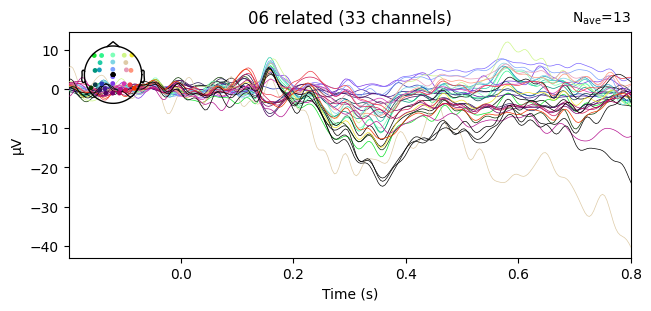

檢查路徑: /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_unrelated-ave.fif
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_unrelated-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.57 × 221 + 0.43 × 222)
        0 CTF compensation matrices available
        nave = 21 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Subject 06, Condition: unrelated, shape: (33, 257)


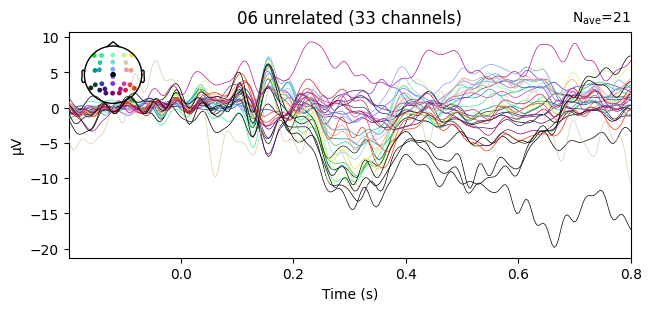

In [ ]:
plot_evoked('06', 'related')
plot_evoked('06', 'unrelated')

##Evoked.plot(picks=ch)

單一通道ERP波形
只顯示某一通道（如 Cz、Pz）的ERP平均波形。X軸時間、Y軸電位（μV）。

用途：
觀察特定腦區的ERP變化，特別是N400這類以Cz/Pz為主的成分。

在N400實驗中：
unrelated條件通常在~400ms會比related條件更負，這就是N400效應。

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sid = '06'  # 例如第六位
cond = 'related'
base_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round'
fname = f'N400_{sid}_{cond}-ave.fif'
path = os.path.join(base_dir, fname)

evoked = mne.read_evokeds(path, condition=0)

Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_related-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.69 × 211 + 0.31 × 212)
        0 CTF compensation matrices available
        nave = 13 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)


Need more than one channel to make topography for eeg. Disabling interactivity.


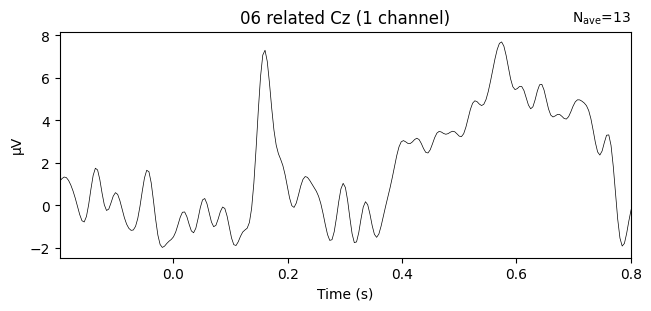

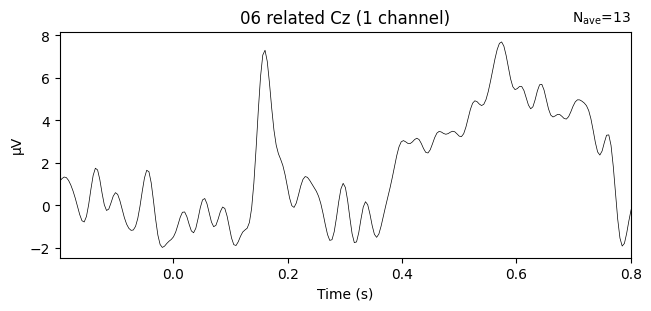

In [ ]:
evoked.plot(picks='Cz', spatial_colors=False, titles=f'{sid} {cond} Cz')

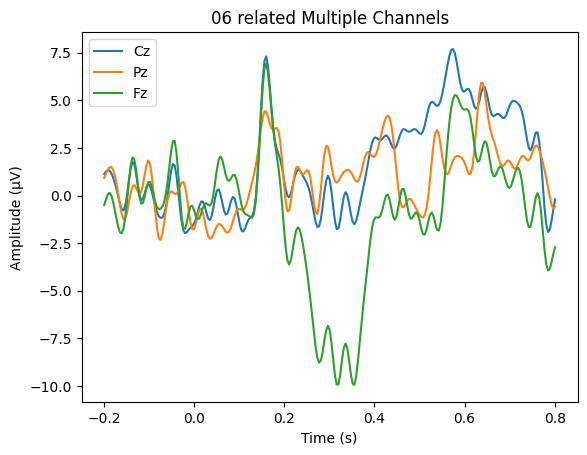

In [ ]:
channels = ['Cz', 'Pz', 'Fz']
for ch_name in channels:
    idx = evoked.ch_names.index(ch_name)
    plt.plot(evoked.times, evoked.data[idx]*1e6, label=ch_name)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.title(f'{sid} {cond} Multiple Channels')
plt.legend()
plt.show()

#8_Plot_Individual_Subject_ERP

In [ ]:
import matplotlib
%matplotlib inline

#matplotlib.use('Agg')  # 必須，才能自動存成 PDF 而不彈出視窗


Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_related_lpf-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.69 × 211 + 0.31 × 212)
        0 CTF compensation matrices available
        nave = 13 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_06_unrelated_lpf-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.57 × 221 + 0.43 × 222)
        0 CTF compensation matrices available
        nave = 21 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 

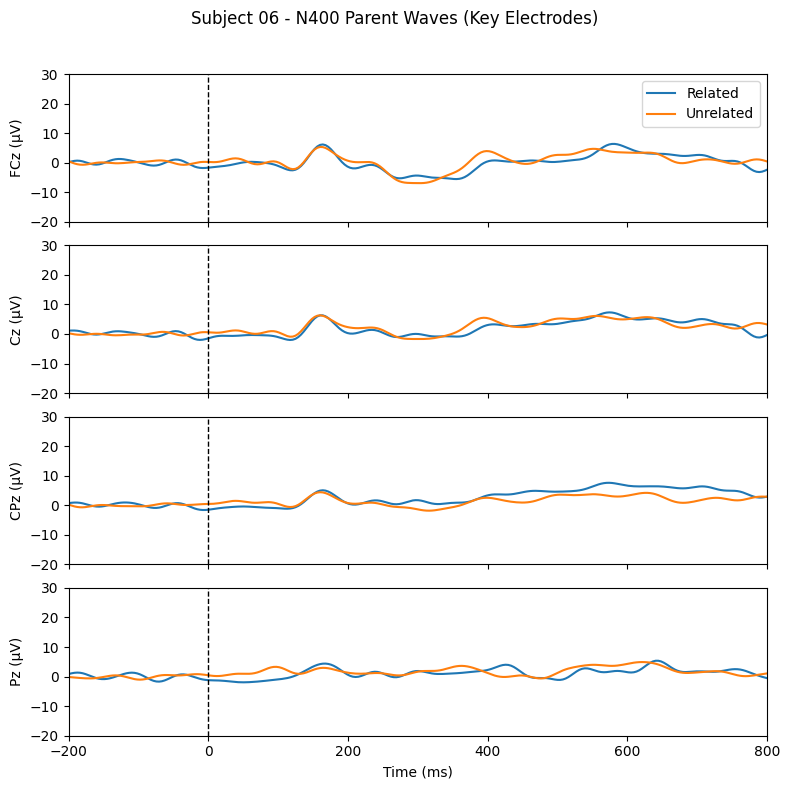

Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_related_lpf-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.50 × 211 + 0.50 × 212)
        0 CTF compensation matrices available
        nave = 60 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_12_unrelated_lpf-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.50 × 221 + 0.50 × 222)
        0 CTF compensation matrices available
        nave = 60 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 

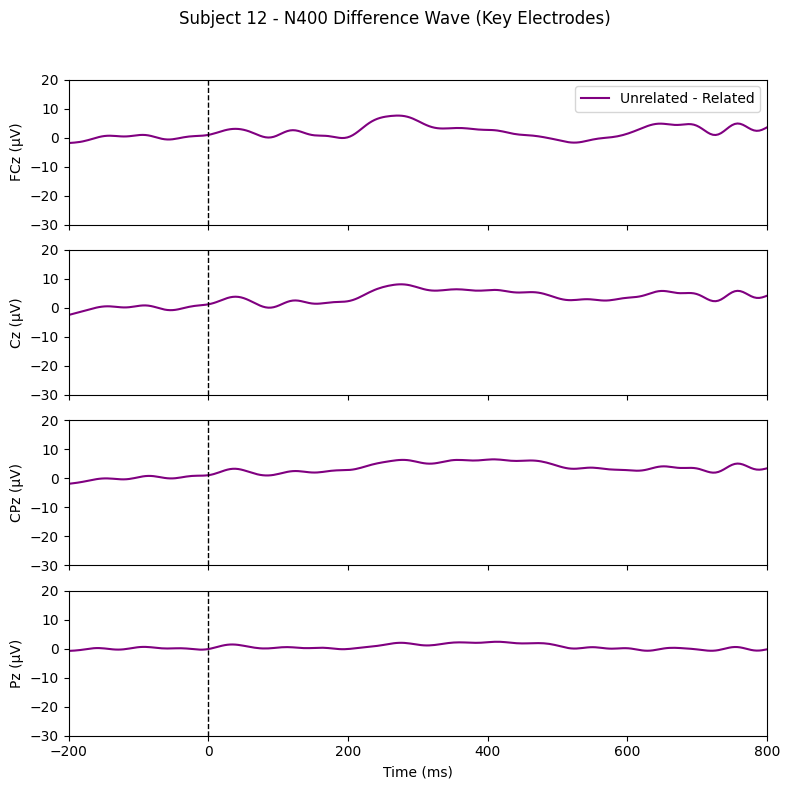

In [ ]:
# ========== 參數 ==========
base_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'
channels_interest = ['FCz', 'Cz', 'CPz', 'Pz']
xlim = (-0.2, 0.8)    # sec
xscale_ticks = list(range(-200, 801, 200))  # ms
yscale_EEG_parent = (-20, 30)
yscale_EEG_diff = (-30, 20)

def show_individual_erp(subject_id, kind='parent'):
    sid = f"{int(subject_id):02d}"
    rel_path = os.path.join(base_dir, f'N400_{sid}_related_lpf-ave.fif')
    unrel_path = os.path.join(base_dir, f'N400_{sid}_unrelated_lpf-ave.fif')
    diff_path = os.path.join(base_dir, f'N400_{sid}_diff_lpf-ave.fif')
    # 檔案檢查
    if not (os.path.exists(rel_path) and os.path.exists(unrel_path) and os.path.exists(diff_path)):
        print(f"Subject {sid}: 檔案缺失，跳過")
        return

    evoked_related_lpf = mne.read_evokeds(rel_path, condition=0)
    evoked_unrelated_lpf = mne.read_evokeds(unrel_path, condition=0)
    evoked_diff_lpf = mne.read_evokeds(diff_path, condition=0)

    if kind == 'parent':
        fig, ax = plt.subplots(len(channels_interest), 1, figsize=(8, 8), sharex=True, sharey=True)
        for idx, ch in enumerate(channels_interest):
            ax[idx].plot(evoked_related_lpf.times*1e3, evoked_related_lpf.data[evoked_related_lpf.ch_names.index(ch)]*1e6, label='Related')
            ax[idx].plot(evoked_unrelated_lpf.times*1e3, evoked_unrelated_lpf.data[evoked_unrelated_lpf.ch_names.index(ch)]*1e6, label='Unrelated')
            ax[idx].set_ylabel(f'{ch} (μV)')
            ax[idx].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[idx].set_ylim(*yscale_EEG_parent)
            ax[idx].set_xticks(xscale_ticks)
            ax[idx].axvline(0, color='k', linestyle='--', linewidth=1)
        ax[-1].set_xlabel('Time (ms)')
        ax[0].legend(loc='upper right')
        plt.suptitle(f'Subject {sid} - N400 Parent Waves (Key Electrodes)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'diff':
        fig, ax = plt.subplots(len(channels_interest), 1, figsize=(8, 8), sharex=True, sharey=True)
        for idx, ch in enumerate(channels_interest):
            ax[idx].plot(evoked_diff_lpf.times*1e3, evoked_diff_lpf.data[evoked_diff_lpf.ch_names.index(ch)]*1e6, color='purple', label='Unrelated - Related')
            ax[idx].set_ylabel(f'{ch} (μV)')
            ax[idx].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[idx].set_ylim(*yscale_EEG_diff)
            ax[idx].set_xticks(xscale_ticks)
            ax[idx].axvline(0, color='k', linestyle='--', linewidth=1)
        ax[-1].set_xlabel('Time (ms)')
        ax[0].legend(loc='upper right')
        plt.suptitle(f'Subject {sid} - N400 Difference Wave (Key Electrodes)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        print("kind 參數只能是 'parent' 或 'diff'")

#找出單一受試者的不同圖種
show_individual_erp(6, kind='parent')
show_individual_erp(12, kind='diff')

#9_Grand_Average_ERP

In [ ]:


# ===== 參數設定 =====
base_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/'
# 根據你要納入的受試者名單調整（這裡示範1~39）
subjects = [f"{i:02d}" for i in range(1, 41)]
# 若有不納入者，直接從list移除

# ===== 檔名格式（根據你存的 ERP檔案）=====
erp_files = {
    "related": "N400_{sid}_related-ave.fif",      # 無低通
    "unrelated": "N400_{sid}_unrelated-ave.fif",
    "diff": "N400_{sid}_diff-ave.fif",
    "related_lpf": "N400_{sid}_related_lpf-ave.fif",  # 有低通
    "unrelated_lpf": "N400_{sid}_unrelated_lpf-ave.fif",
    "diff_lpf": "N400_{sid}_diff_lpf-ave.fif"
}

# ===== 讀取所有個別受試者的 ERP（無低通） =====
evokeds_related = []
evokeds_unrelated = []
evokeds_diff = []
for sid in subjects:
    try:
        er = mne.read_evokeds(os.path.join(base_dir, erp_files["related"].format(sid=sid)), condition=0)
        eu = mne.read_evokeds(os.path.join(base_dir, erp_files["unrelated"].format(sid=sid)), condition=0)
        ed = mne.read_evokeds(os.path.join(base_dir, erp_files["diff"].format(sid=sid)), condition=0)
        evokeds_related.append(er)
        evokeds_unrelated.append(eu)
        evokeds_diff.append(ed)
    except Exception as e:
        print(f"Subject {sid} missing file or error: {e}")

# ===== Grand Average（無低通） =====
GA_related = mne.grand_average(evokeds_related)
GA_unrelated = mne.grand_average(evokeds_unrelated)
GA_diff = mne.grand_average(evokeds_diff)

# ===== 讀取所有個別受試者的 ERP（有低通） =====
evokeds_related_lpf = []
evokeds_unrelated_lpf = []
evokeds_diff_lpf = []
for sid in subjects:
    try:
        er = mne.read_evokeds(os.path.join(base_dir, erp_files["related_lpf"].format(sid=sid)), condition=0)
        eu = mne.read_evokeds(os.path.join(base_dir, erp_files["unrelated_lpf"].format(sid=sid)), condition=0)
        ed = mne.read_evokeds(os.path.join(base_dir, erp_files["diff_lpf"].format(sid=sid)), condition=0)
        evokeds_related_lpf.append(er)
        evokeds_unrelated_lpf.append(eu)
        evokeds_diff_lpf.append(ed)
    except Exception as e:
        print(f"Subject {sid} missing (lpf) file or error: {e}")

# ===== Grand Average（有低通） =====
GA_related_lpf = mne.grand_average(evokeds_related_lpf)
GA_unrelated_lpf = mne.grand_average(evokeds_unrelated_lpf)
GA_diff_lpf = mne.grand_average(evokeds_diff_lpf)

# ===== 可選：計算 SEM（標準誤） =====
def compute_sem(evokeds_list):
    # shape: (n_subjects, n_channels, n_times)
    data = np.array([ev.data for ev in evokeds_list])
    sem = np.std(data, axis=0, ddof=1) / np.sqrt(data.shape[0])
    return sem

sem_related = compute_sem(evokeds_related) if len(evokeds_related)>1 else None
sem_unrelated = compute_sem(evokeds_unrelated) if len(evokeds_unrelated) > 1 else None
sem_diff = compute_sem(evokeds_diff) if len(evokeds_diff)>1 else None
sem_related_lpf = compute_sem(evokeds_related_lpf) if len(evokeds_related_lpf)>1 else None
sem_unrelated_lpf = compute_sem(evokeds_unrelated_lpf) if len(evokeds_unrelated_lpf)>1 else None
sem_diff_lpf = compute_sem(evokeds_diff_lpf) if len(evokeds_diff_lpf)>1 else None

# ===== 儲存 Grand Average ERP =====
out_dir = os.path.join(base_dir, 'GrandAverage')
os.makedirs(out_dir, exist_ok=True)
GA_related.save(os.path.join(out_dir, 'GA_N400_related-ave.fif'), overwrite=True)
GA_unrelated.save(os.path.join(out_dir, 'GA_N400_unrelated-ave.fif'), overwrite=True)
GA_diff.save(os.path.join(out_dir, 'GA_N400_diff-ave.fif'), overwrite=True)
GA_related_lpf.save(os.path.join(out_dir, 'GA_N400_related_lpf-ave.fif'), overwrite=True)
GA_unrelated_lpf.save(os.path.join(out_dir, 'GA_N400_unrelated_lpf-ave.fif'), overwrite=True)
GA_diff_lpf.save(os.path.join(out_dir, 'GA_N400_diff_lpf-ave.fif'), overwrite=True)



Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_related-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.40 × 211 + 0.60 × 212)
        0 CTF compensation matrices available
        nave = 45 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/N400_01_unrelated-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (0.46 × 221 + 0.54 × 222)
        0 CTF compensation matrices available
        nave = 41 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 Analysis

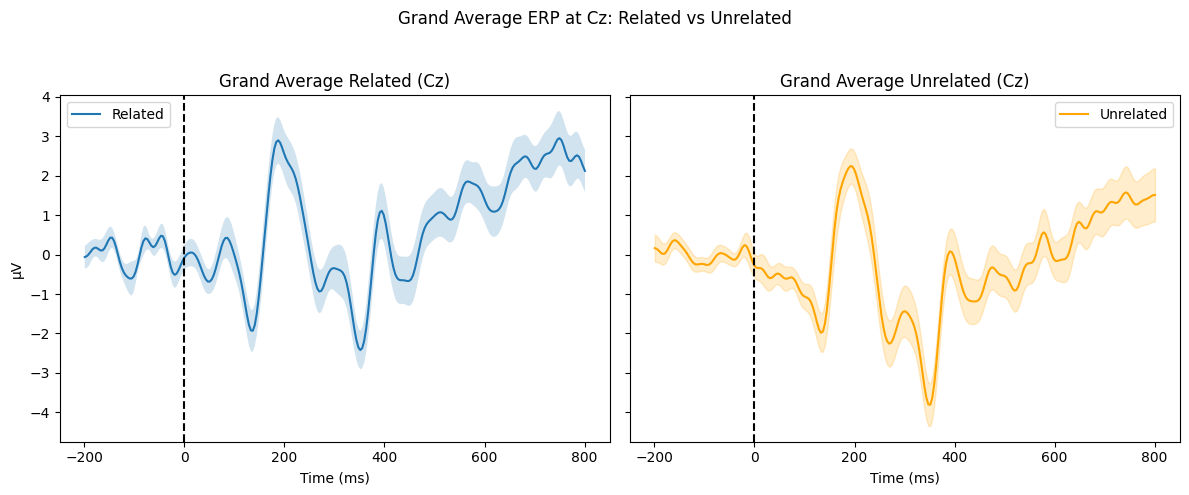

In [ ]:
# ===== 可選：快速畫圖（例：Cz channel） =====

ch = 'Cz'
idx = GA_related.ch_names.index(ch)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# -- Related --
axes[0].plot(GA_related.times*1e3, GA_related.data[idx]*1e6, label='Related')
if sem_related is not None:
    axes[0].fill_between(
        GA_related.times*1e3,
        (GA_related.data[idx]-sem_related[idx])*1e6,
        (GA_related.data[idx]+sem_related[idx])*1e6,
        alpha=0.2
    )
axes[0].axvline(0, color='k', linestyle='--')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('μV')
axes[0].set_title('Grand Average Related (Cz)')
axes[0].legend()

# -- Unrelated --
axes[1].plot(GA_unrelated.times*1e3, GA_unrelated.data[idx]*1e6, label='Unrelated', color='orange')
if sem_unrelated is not None:
    axes[1].fill_between(
        GA_unrelated.times*1e3,
        (GA_unrelated.data[idx]-sem_unrelated[idx])*1e6,
        (GA_unrelated.data[idx]+sem_unrelated[idx])*1e6,
        alpha=0.2, color='orange'
    )
axes[1].axvline(0, color='k', linestyle='--')
axes[1].set_xlabel('Time (ms)')
axes[1].set_title('Grand Average Unrelated (Cz)')
axes[1].legend()

plt.suptitle('Grand Average ERP at Cz: Related vs Unrelated')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#10_Plot_Grand_Average_ERPs

Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/GrandAverage/GA_N400_related_lpf-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (Grand average (n = 40))
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/GrandAverage/GA_N400_unrelated_lpf-ave.fif ...
    Found the data of interest:
        t =    -199.22 ...     800.78 ms (Grand average (n = 40))
        0 CTF compensation matrices available
        nave = 40 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
Reading /content/drive/MyDri

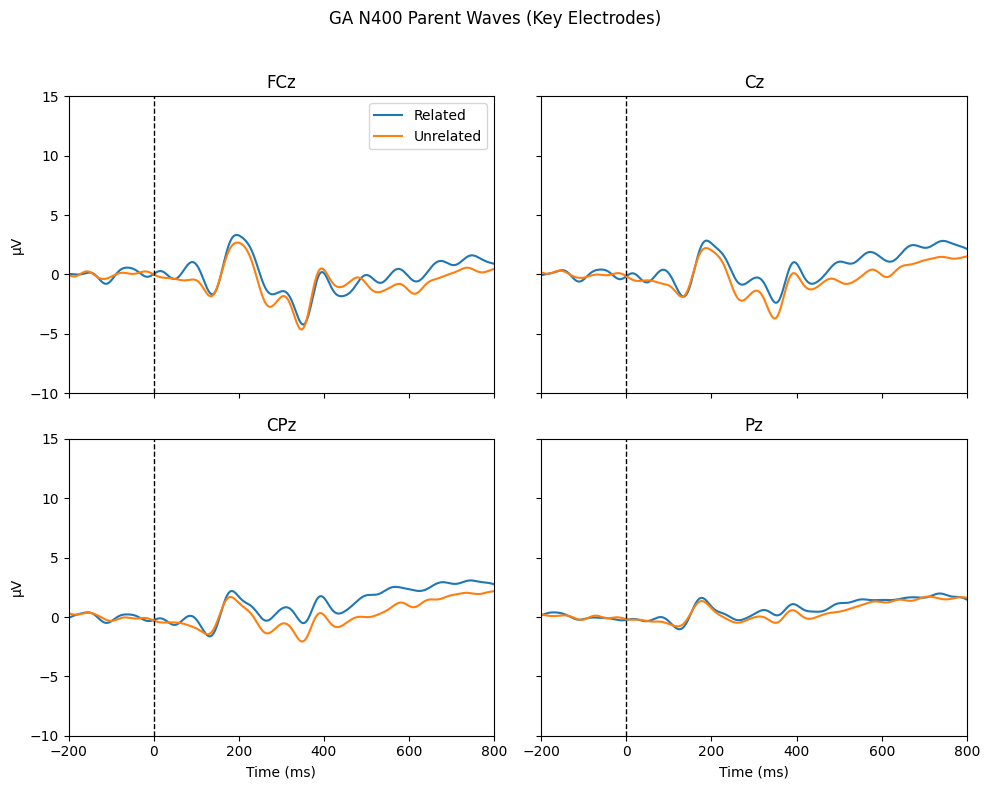

In [ ]:

# 參數
base_dir = '/content/drive/MyDrive/neuro something/N400 Analysis Files/Preprossed data for Brainhack/second round/GrandAverage'
channels_interest = ['FCz', 'Cz', 'CPz', 'Pz']
xlim = (-0.2, 0.8)
xscale_ticks = np.arange(-200, 801, 200)
yscale_EEG_parent = (-10, 15)
yscale_EEG_diff = (-15, 10)
yscale_HEOG = (-15, 15)
yscale_VEOG = (-25, 25)

# 載入 Grand Average
GA_related_lpf = mne.read_evokeds(os.path.join(base_dir, 'GA_N400_related_lpf-ave.fif'), condition=0)
GA_unrelated_lpf = mne.read_evokeds(os.path.join(base_dir, 'GA_N400_unrelated_lpf-ave.fif'), condition=0)
GA_diff_lpf = mne.read_evokeds(os.path.join(base_dir, 'GA_N400_diff_lpf-ave.fif'), condition=0)

def show_grand_erp(kind='parent', sem_diff_lpf=None, show_channels=None):
    """
    kind: 'parent', 'diff', 'diff_sem', 'parent_all', 'diff_all', 'heog', 'veog'
    sem_diff_lpf: 若要畫 diff 的 SEM，請傳入 shape (n_channels, n_times) 的 numpy array
    show_channels: 若要更換要畫的 channel 名稱陣列，預設為 channels_interest
    """
    if show_channels is None:
        show_channels = channels_interest
    if kind == 'parent':
        fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
        for i, ch in enumerate(show_channels):
            row, col = divmod(i, 2)
            idx = GA_related_lpf.ch_names.index(ch)
            ax[row][col].plot(GA_related_lpf.times*1e3, GA_related_lpf.data[idx]*1e6, label='Related')
            ax[row][col].plot(GA_unrelated_lpf.times*1e3, GA_unrelated_lpf.data[idx]*1e6, label='Unrelated')
            ax[row][col].set_title(ch)
            ax[row][col].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[row][col].set_ylim(*yscale_EEG_parent)
            ax[row][col].set_xticks(xscale_ticks)
            ax[row][col].axvline(0, color='k', linestyle='--', linewidth=1)
            if row == 1:
                ax[row][col].set_xlabel('Time (ms)')
            if col == 0:
                ax[row][col].set_ylabel('μV')
        ax[0][0].legend()
        plt.suptitle('GA N400 Parent Waves (Key Electrodes)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'diff':
        fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
        for i, ch in enumerate(show_channels):
            row, col = divmod(i, 2)
            idx = GA_diff_lpf.ch_names.index(ch)
            ax[row][col].plot(GA_diff_lpf.times*1e3, GA_diff_lpf.data[idx]*1e6, color='purple', label='Unrel-Rel')
            ax[row][col].set_title(ch)
            ax[row][col].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[row][col].set_ylim(*yscale_EEG_diff)
            ax[row][col].set_xticks(xscale_ticks)
            ax[row][col].axvline(0, color='k', linestyle='--', linewidth=1)
            if row == 1:
                ax[row][col].set_xlabel('Time (ms)')
            if col == 0:
                ax[row][col].set_ylabel('μV')
        ax[0][0].legend()
        plt.suptitle('GA N400 Difference Wave (Key Electrodes)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'diff_sem':
        if sem_diff_lpf is None:
            print("請先計算好 sem_diff_lpf 再傳入！")
            return
        fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
        for i, ch in enumerate(show_channels):
            row, col = divmod(i, 2)
            idx = GA_diff_lpf.ch_names.index(ch)
            ax[row][col].plot(GA_diff_lpf.times*1e3, GA_diff_lpf.data[idx]*1e6, color='purple', label='Unrel-Rel')
            ax[row][col].fill_between(GA_diff_lpf.times*1e3,
                                     (GA_diff_lpf.data[idx]-sem_diff_lpf[idx])*1e6,
                                     (GA_diff_lpf.data[idx]+sem_diff_lpf[idx])*1e6,
                                     color='purple', alpha=0.2, label='SEM')
            ax[row][col].set_title(ch)
            ax[row][col].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[row][col].set_ylim(*yscale_EEG_diff)
            ax[row][col].set_xticks(xscale_ticks)
            ax[row][col].axvline(0, color='k', linestyle='--', linewidth=1)
            if row == 1:
                ax[row][col].set_xlabel('Time (ms)')
            if col == 0:
                ax[row][col].set_ylabel('μV')
        ax[0][0].legend()
        plt.suptitle('GA N400 Difference Wave (Key Electrodes, SEM)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'parent_all':
        channels_all = GA_related_lpf.ch_names
        n_all = len(channels_all)
        ncol = 7
        nrow = int(np.ceil(n_all / ncol))
        fig, ax = plt.subplots(nrow, ncol, figsize=(2*ncol, 1.2*n_all), sharex=True, sharey=True)
        for i, ch in enumerate(channels_all):
            r, c = divmod(i, ncol)
            idx = GA_related_lpf.ch_names.index(ch)
            ax[r][c].plot(GA_related_lpf.times*1e3, GA_related_lpf.data[idx]*1e6, label='Related')
            ax[r][c].plot(GA_unrelated_lpf.times*1e3, GA_unrelated_lpf.data[idx]*1e6, label='Unrelated')
            ax[r][c].set_title(ch, fontsize=8)
            ax[r][c].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[r][c].set_ylim(*yscale_EEG_parent)
            ax[r][c].set_xticks(xscale_ticks)
            ax[r][c].axvline(0, color='k', linestyle='--', linewidth=1)
            if r == nrow-1:
                ax[r][c].set_xlabel('Time (ms)')
            if c == 0:
                ax[r][c].set_ylabel('μV')
        for i in range(n_all, nrow*ncol):
            fig.delaxes(ax.flatten()[i])
        ax[0][0].legend(fontsize=8)
        plt.suptitle('GA N400 Parent Waves (All Channels)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'diff_all':
        channels_all = GA_diff_lpf.ch_names
        n_all = len(channels_all)
        ncol = 7
        nrow = int(np.ceil(n_all / ncol))
        fig, ax = plt.subplots(nrow, ncol, figsize=(2*ncol, 1.2*n_all), sharex=True, sharey=True)
        for i, ch in enumerate(channels_all):
            r, c = divmod(i, ncol)
            idx = GA_diff_lpf.ch_names.index(ch)
            ax[r][c].plot(GA_diff_lpf.times*1e3, GA_diff_lpf.data[idx]*1e6, color='purple', label='Unrel-Rel')
            ax[r][c].set_title(ch, fontsize=8)
            ax[r][c].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[r][c].set_ylim(*yscale_EEG_diff)
            ax[r][c].set_xticks(xscale_ticks)
            ax[r][c].axvline(0, color='k', linestyle='--', linewidth=1)
            if r == nrow-1:
                ax[r][c].set_xlabel('Time (ms)')
            if c == 0:
                ax[r][c].set_ylabel('μV')
        for i in range(n_all, nrow*ncol):
            fig.delaxes(ax.flatten()[i])
        ax[0][0].legend(fontsize=8)
        plt.suptitle('GA N400 Difference Wave (All Channels)')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'heog':
        heog_chs = ['HEOG', 'HEOG_uncorrected']
        fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
        for i, ch in enumerate(heog_chs):
            idx = GA_related_lpf.ch_names.index(ch)
            ax[i].plot(GA_related_lpf.times*1e3, GA_related_lpf.data[idx]*1e6, label='Related')
            ax[i].plot(GA_unrelated_lpf.times*1e3, GA_unrelated_lpf.data[idx]*1e6, label='Unrelated')
            ax[i].set_title(ch)
            ax[i].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[i].set_ylim(*yscale_HEOG)
            ax[i].set_xticks(xscale_ticks)
            ax[i].axvline(0, color='k', linestyle='--', linewidth=1)
            ax[i].set_xlabel('Time (ms)')
            if i == 0:
                ax[i].set_ylabel('μV')
        ax[0].legend()
        plt.suptitle('GA N400 HEOG')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    elif kind == 'veog':
        veog_chs = ['VEOG', 'VEOG_bipolar', 'VEOG_uncorrected']
        fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
        for i, ch in enumerate(veog_chs):
            idx = GA_related_lpf.ch_names.index(ch)
            ax[i].plot(GA_related_lpf.times*1e3, GA_related_lpf.data[idx]*1e6, label='Related')
            ax[i].plot(GA_unrelated_lpf.times*1e3, GA_unrelated_lpf.data[idx]*1e6, label='Unrelated')
            ax[i].set_title(ch)
            ax[i].set_xlim(xlim[0]*1e3, xlim[1]*1e3)
            ax[i].set_ylim(*yscale_VEOG)
            ax[i].set_xticks(xscale_ticks)
            ax[i].axvline(0, color='k', linestyle='--', linewidth=1)
            ax[i].set_xlabel('Time (ms)')
            if i == 0:
                ax[i].set_ylabel('μV')
        ax[0].legend()
        plt.suptitle('GA N400 VEOG')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
    else:
        print("kind 參數請用 'parent', 'diff', 'diff_sem', 'parent_all', 'diff_all', 'heog', 'veog' 其中之一。")


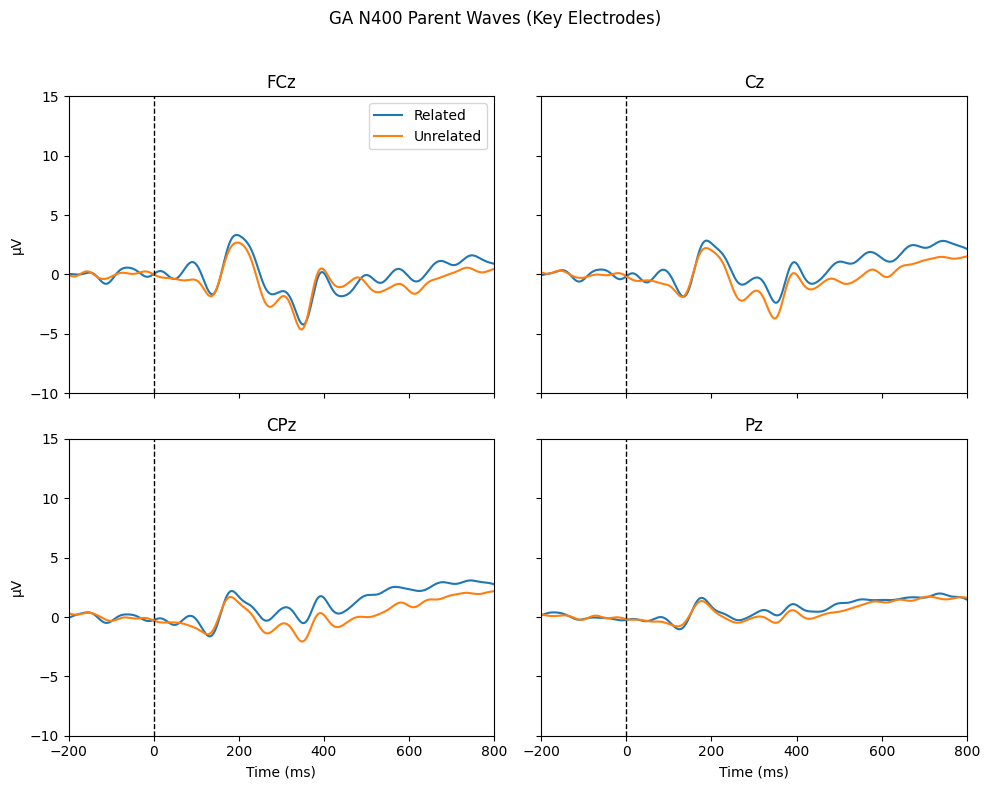

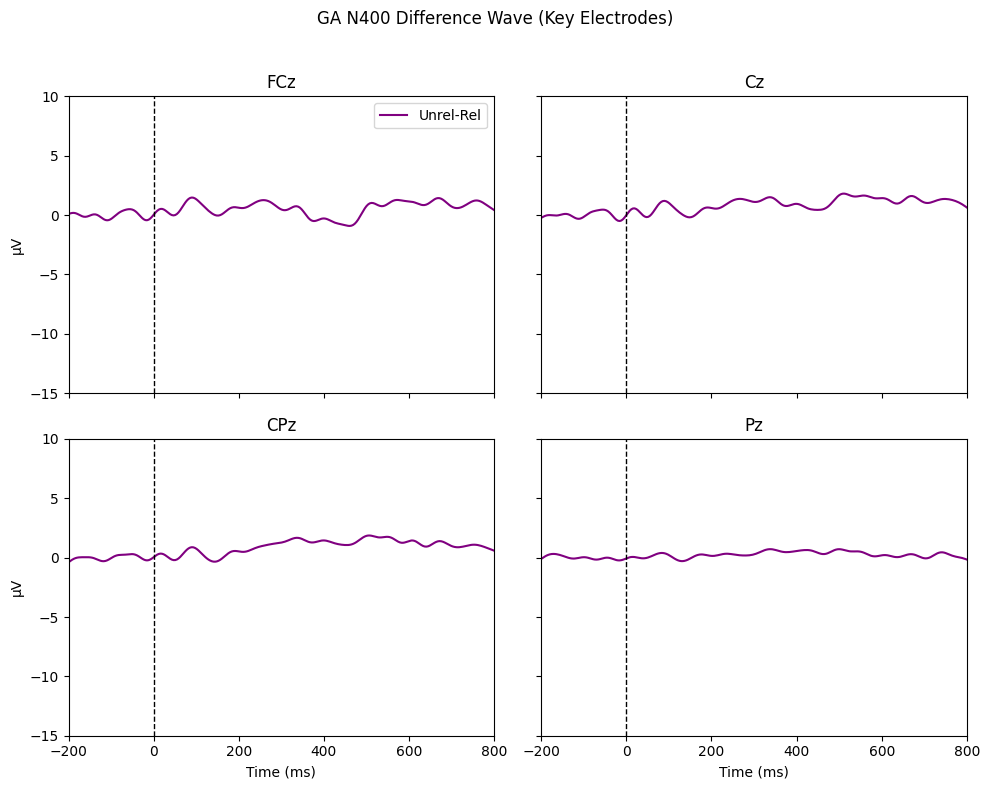

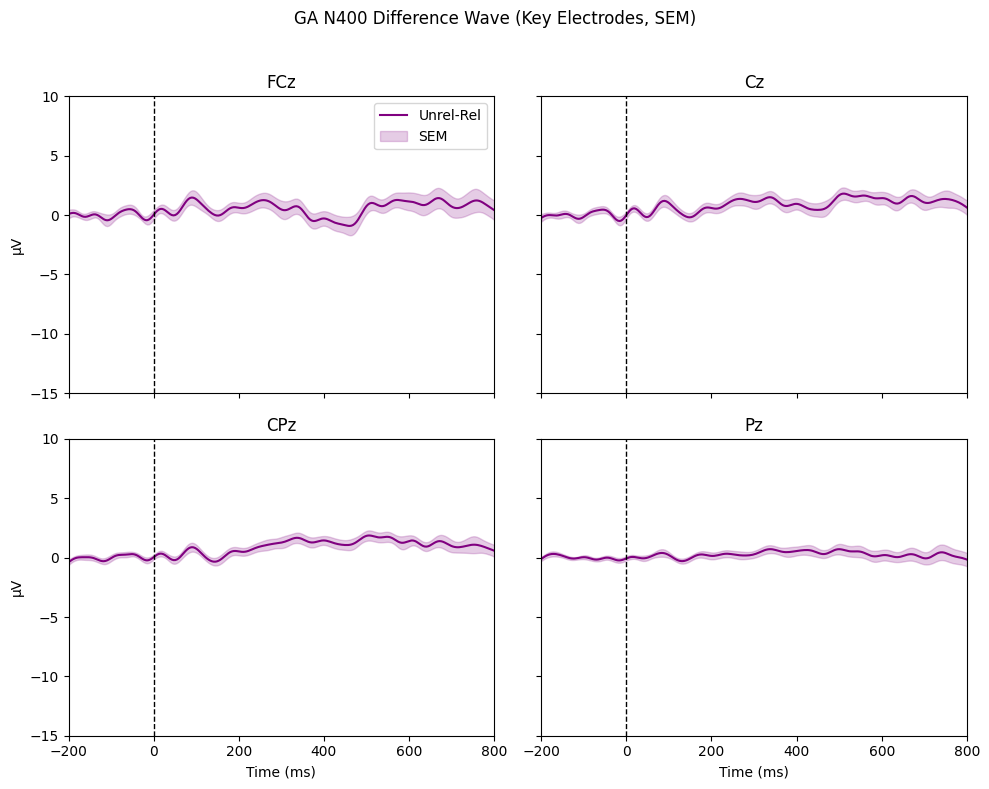

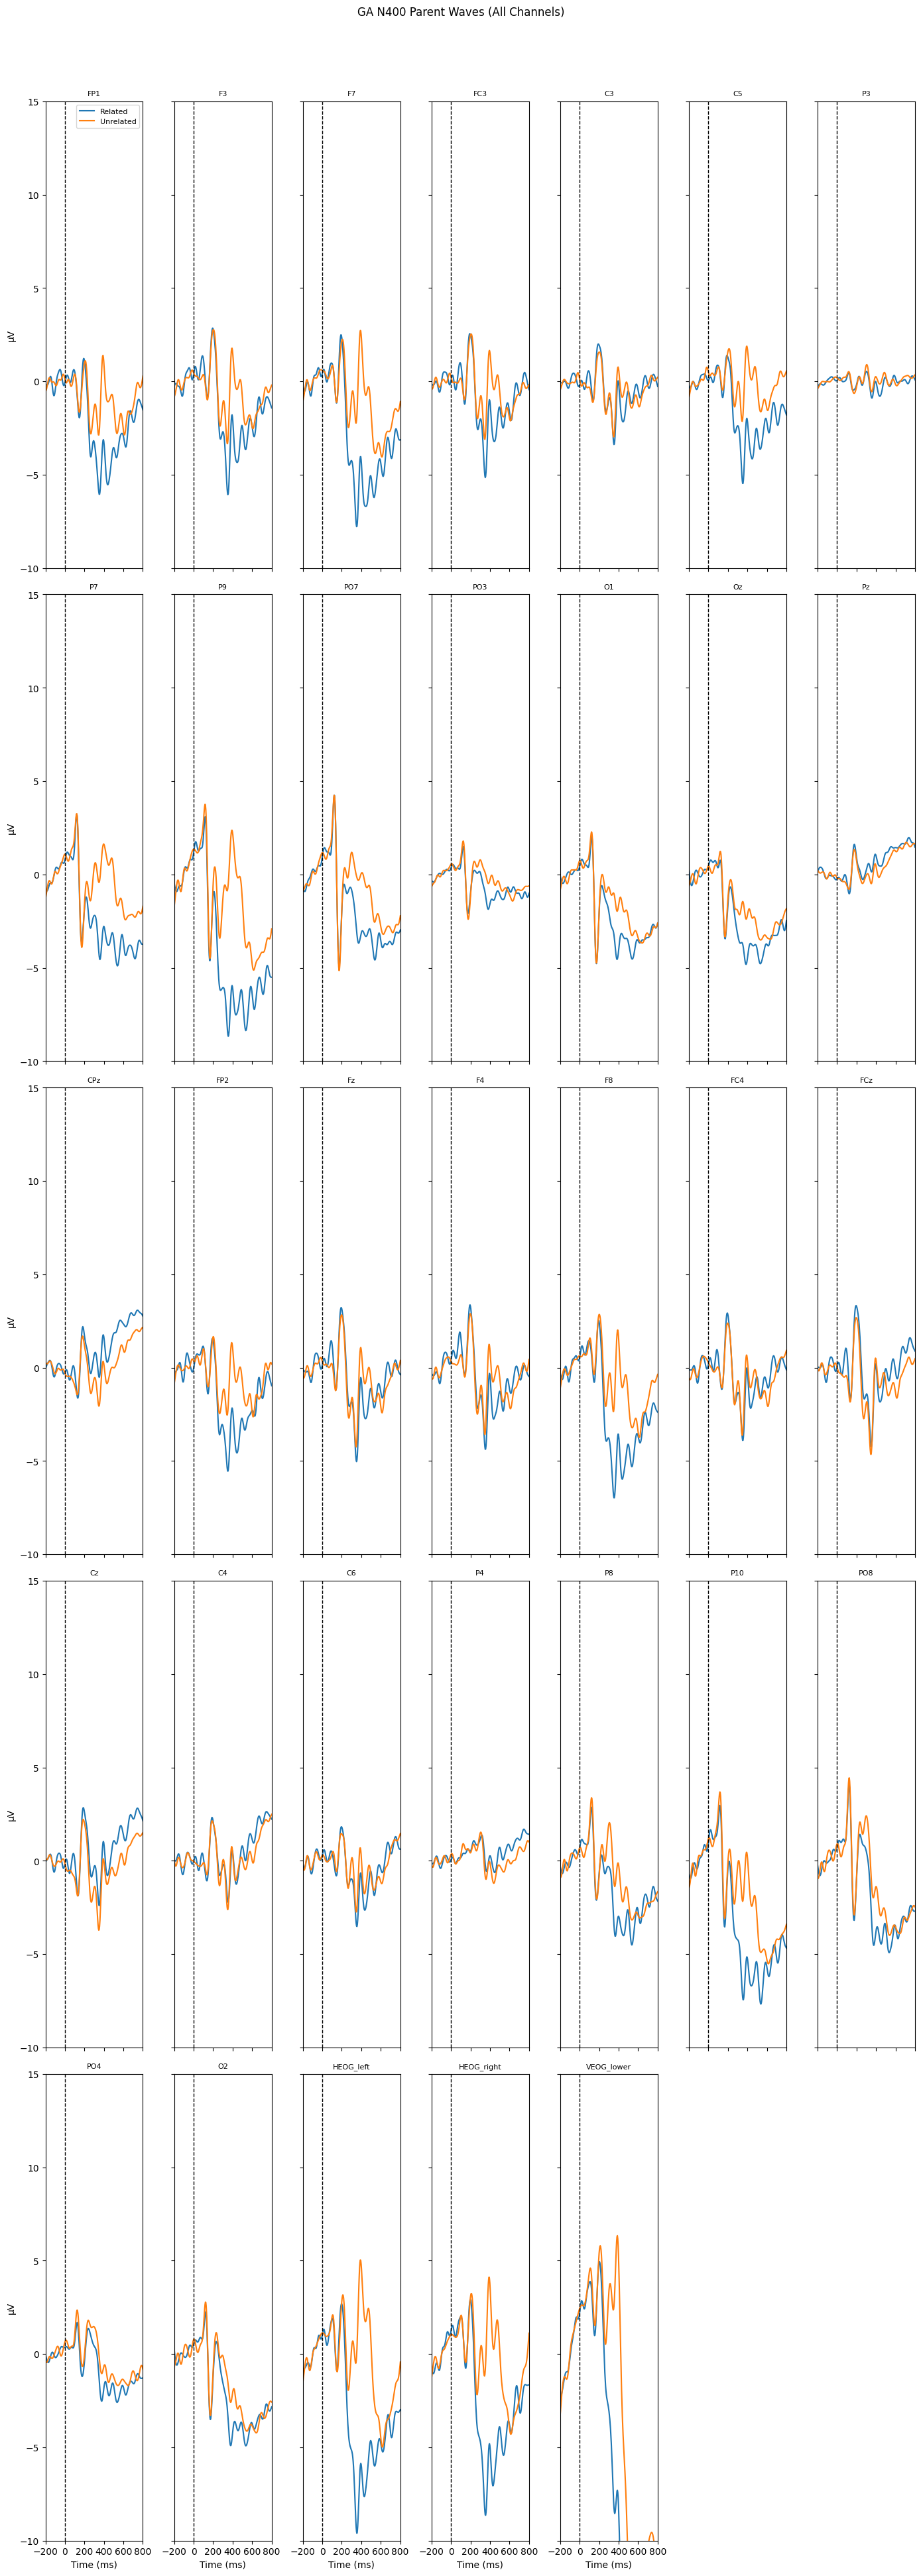

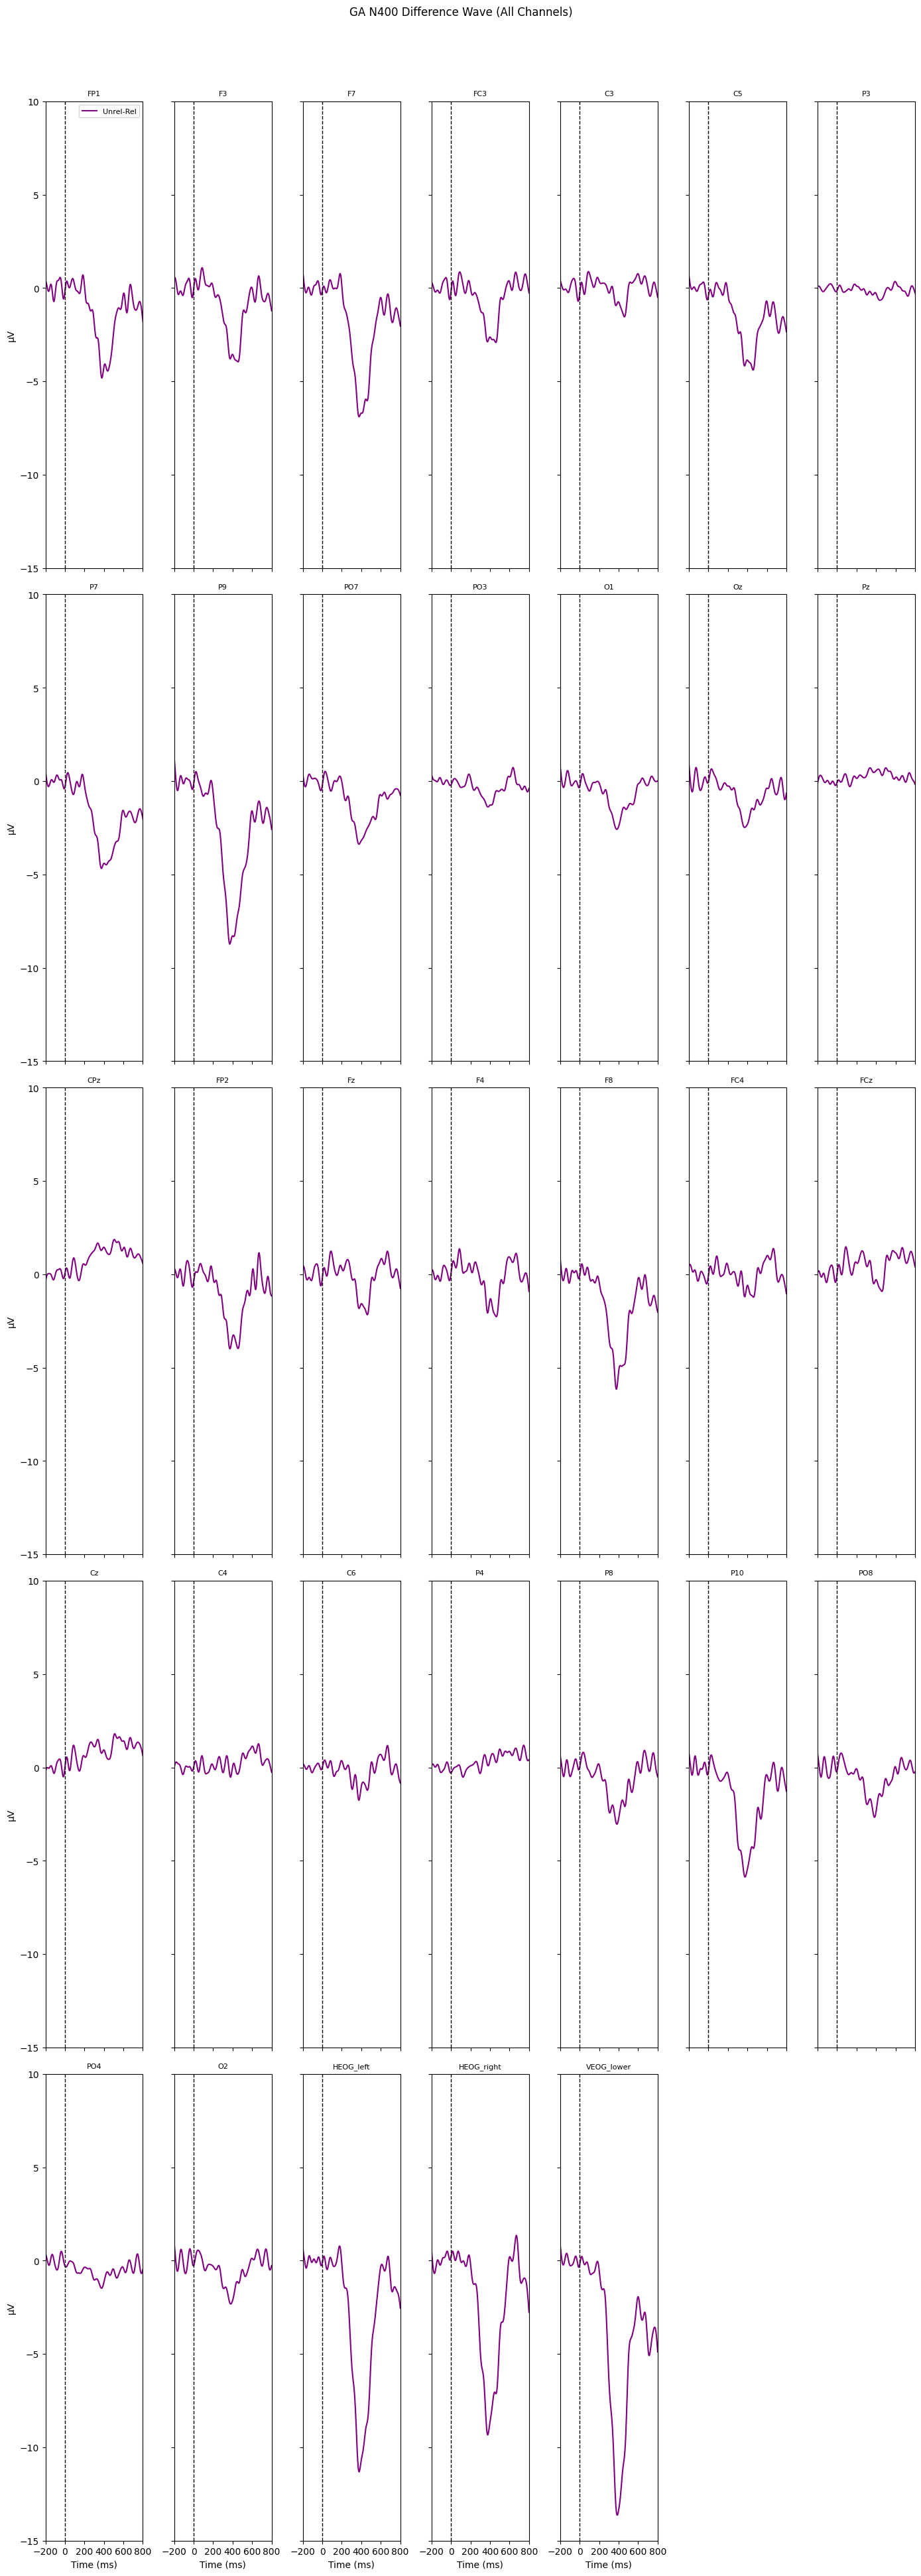

ValueError: 'HEOG' is not in list

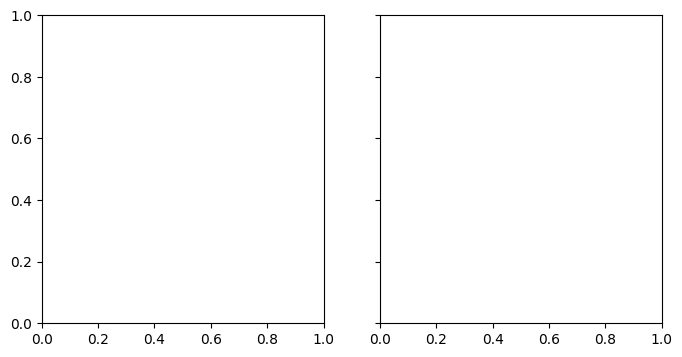

In [ ]:

# === 使用範例 ===
show_grand_erp('parent')        # 關鍵電極 parent 疊圖
show_grand_erp('diff')          # 關鍵電極 difference 疊圖
show_grand_erp('diff_sem', sem_diff_lpf=sem_diff_lpf)  # difference+SEM
#show_grand_erp('parent_all')    # 全通道 parent 疊圖
#show_grand_erp('diff_all')      # 全通道 difference 疊圖
#show_grand_erp('heog')          # HEOG 疊圖
#show_grand_erp('veog')          # VEOG 疊圖

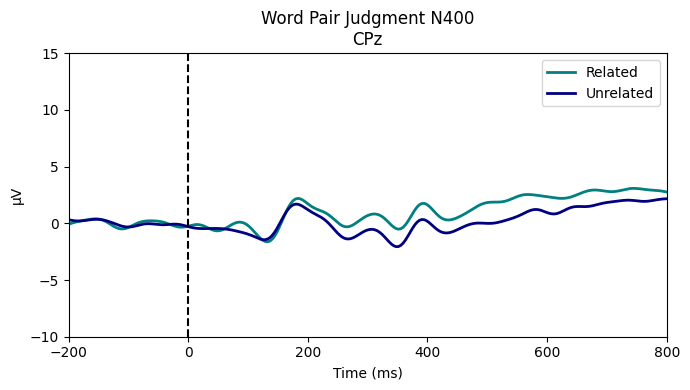

In [ ]:


ch = 'CPz'
idx = GA_related_lpf.ch_names.index(ch)
plt.figure(figsize=(7, 4))
plt.plot(GA_related_lpf.times*1e3, GA_related_lpf.data[idx]*1e6, label='Related', color='teal', linewidth=2)
plt.plot(GA_unrelated_lpf.times*1e3, GA_unrelated_lpf.data[idx]*1e6, label='Unrelated', color='navy', linewidth=2)
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('Time (ms)')
plt.ylabel('μV')
plt.xlim(-200, 800)
plt.ylim(-10, 15)
plt.title('Word Pair Judgment N400\nCPz')
plt.legend()
plt.tight_layout()
plt.show()